**Context
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).**

**These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).**

In [10]:
#This is a simple dataset for regression and classification, and it is clean
#In first Place we import those packages we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

**Getting the info of the data**

In [11]:
# import data 
df = pd.read_csv('winequality-red.csv')
df.head(),df.shape

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  
 0      9.4        5  
 1      9.8        5  
 2 

In [12]:
#get the info of the dataset by df.info()
df.info()#there has no missing value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**It seems we have missing value, so we are going to get insightful knowledges by plotting.**

/Users/marcowang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


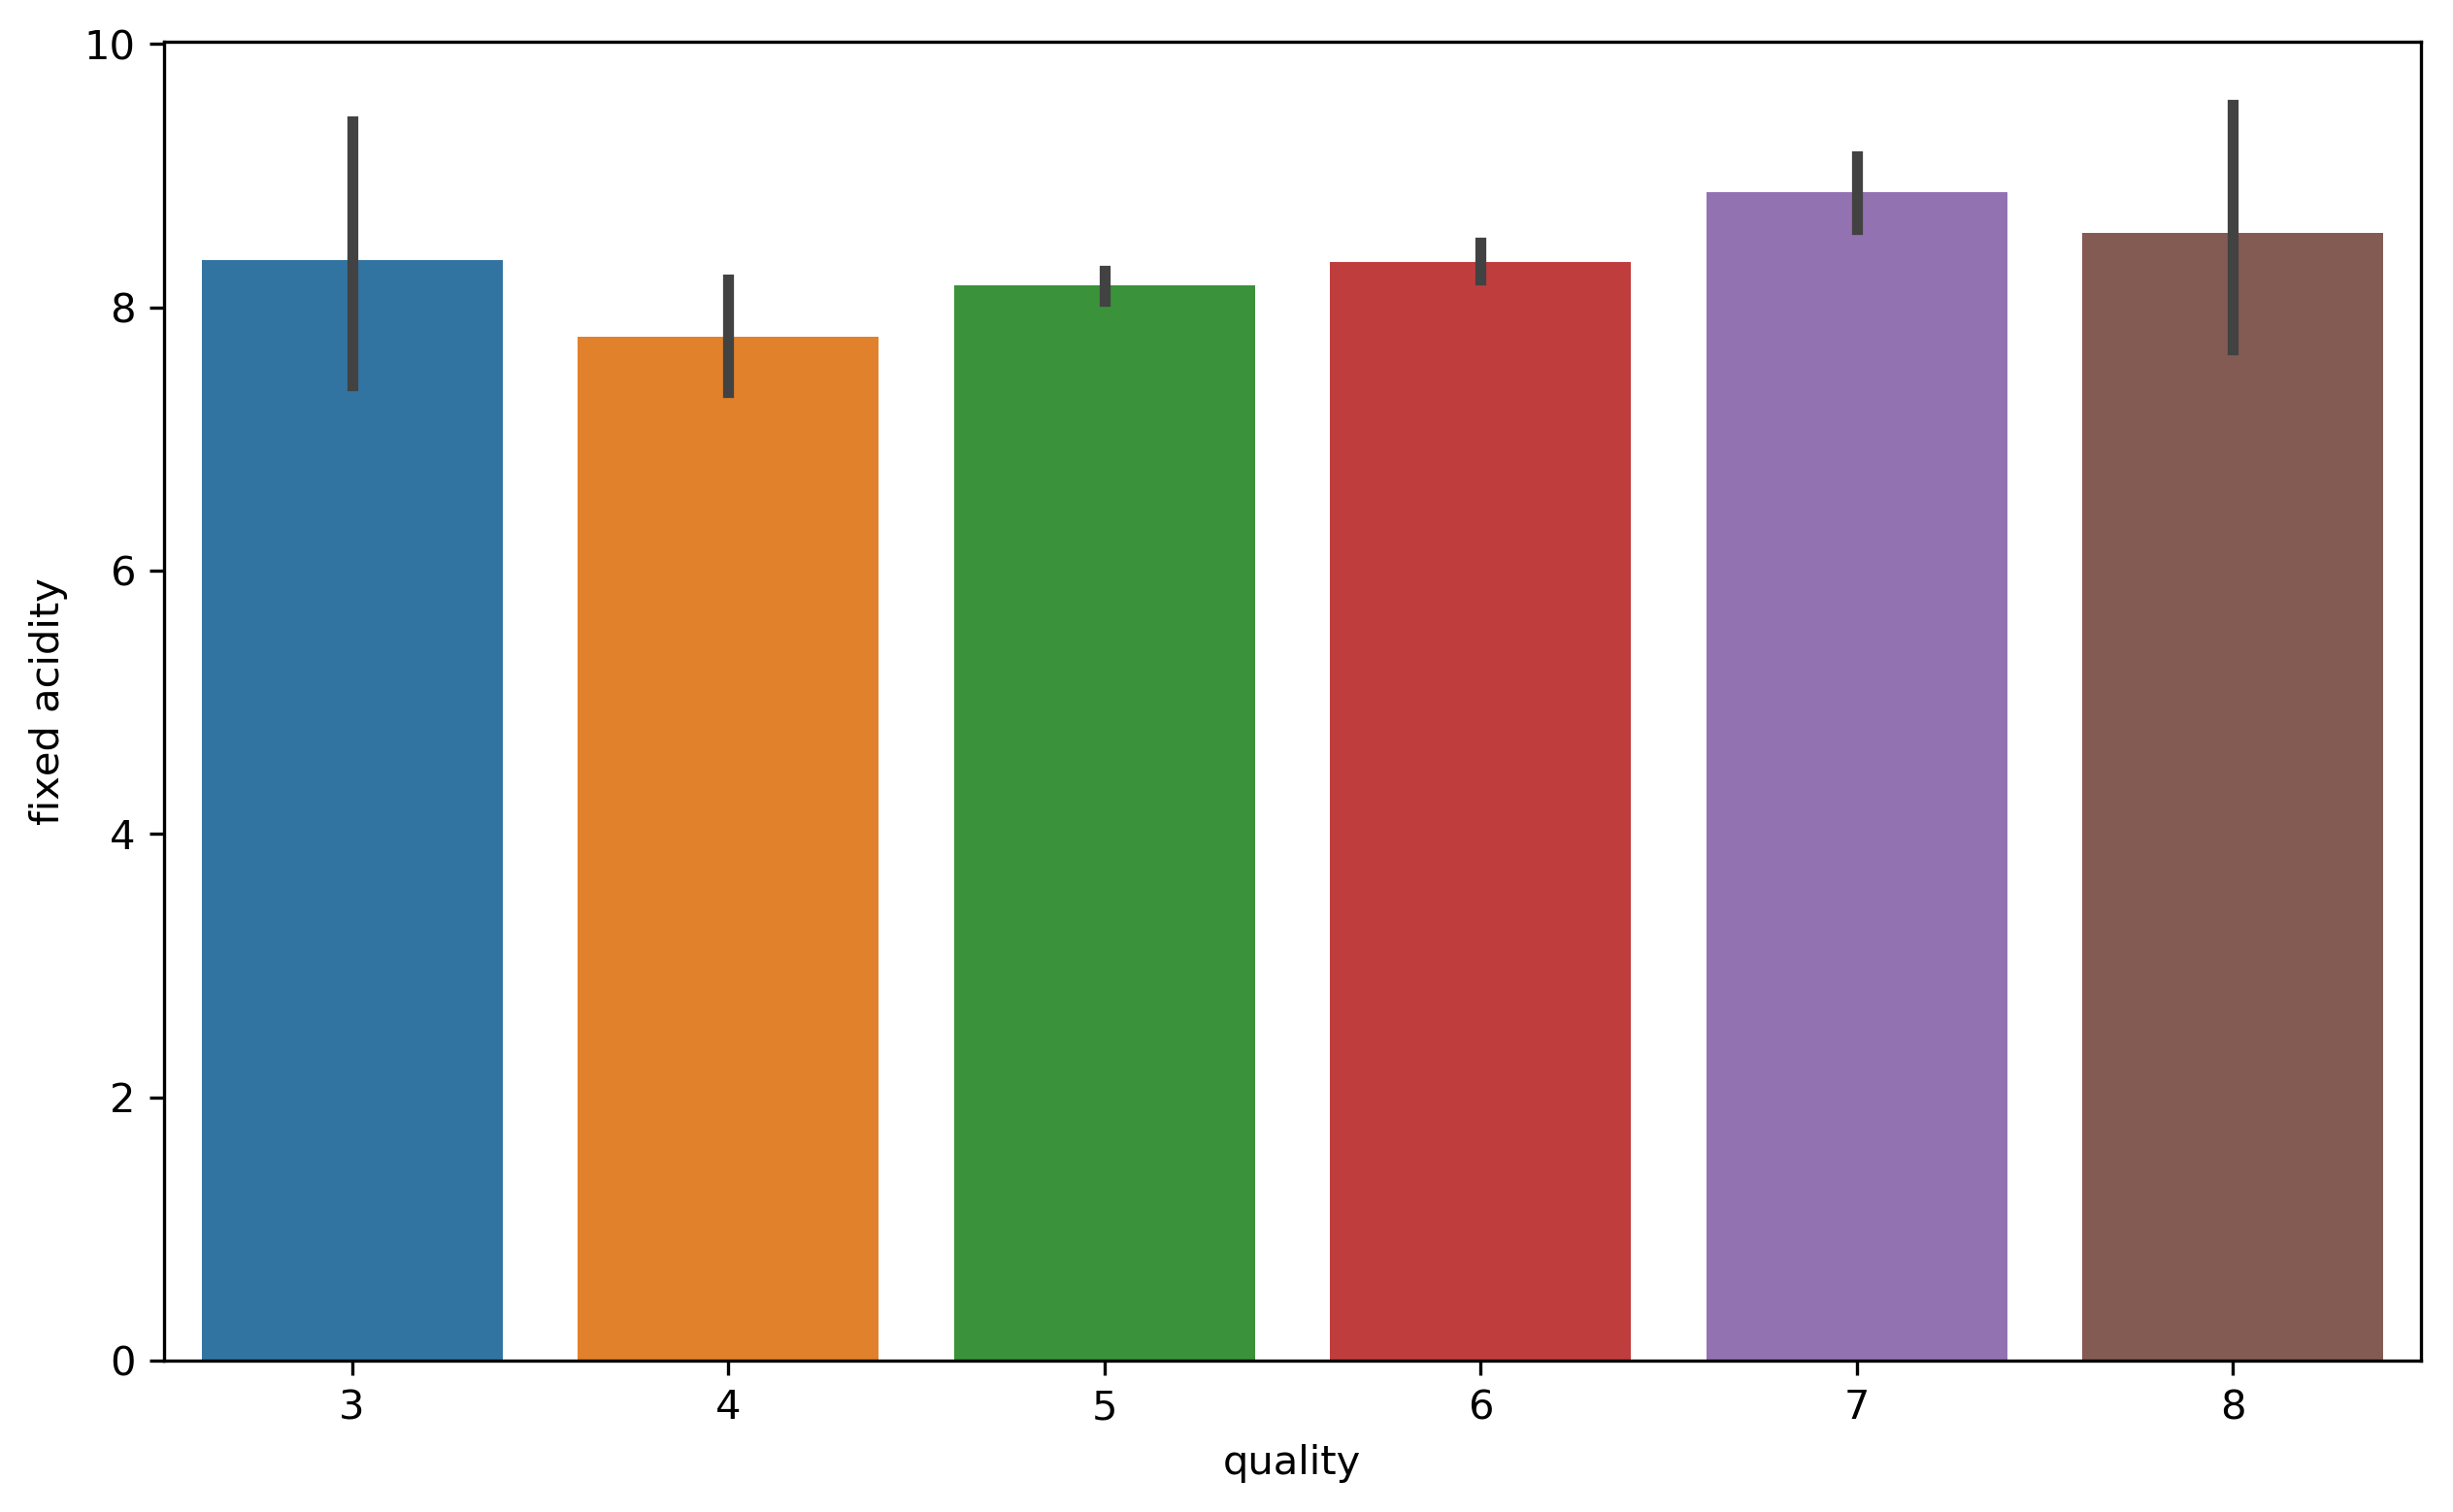

In [13]:
sns.set_style()#using seaborn style
fig = plt.figure(figsize = (10,6),dpi =300)#参数自己查
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)#柱状图
#两端的黑线更长

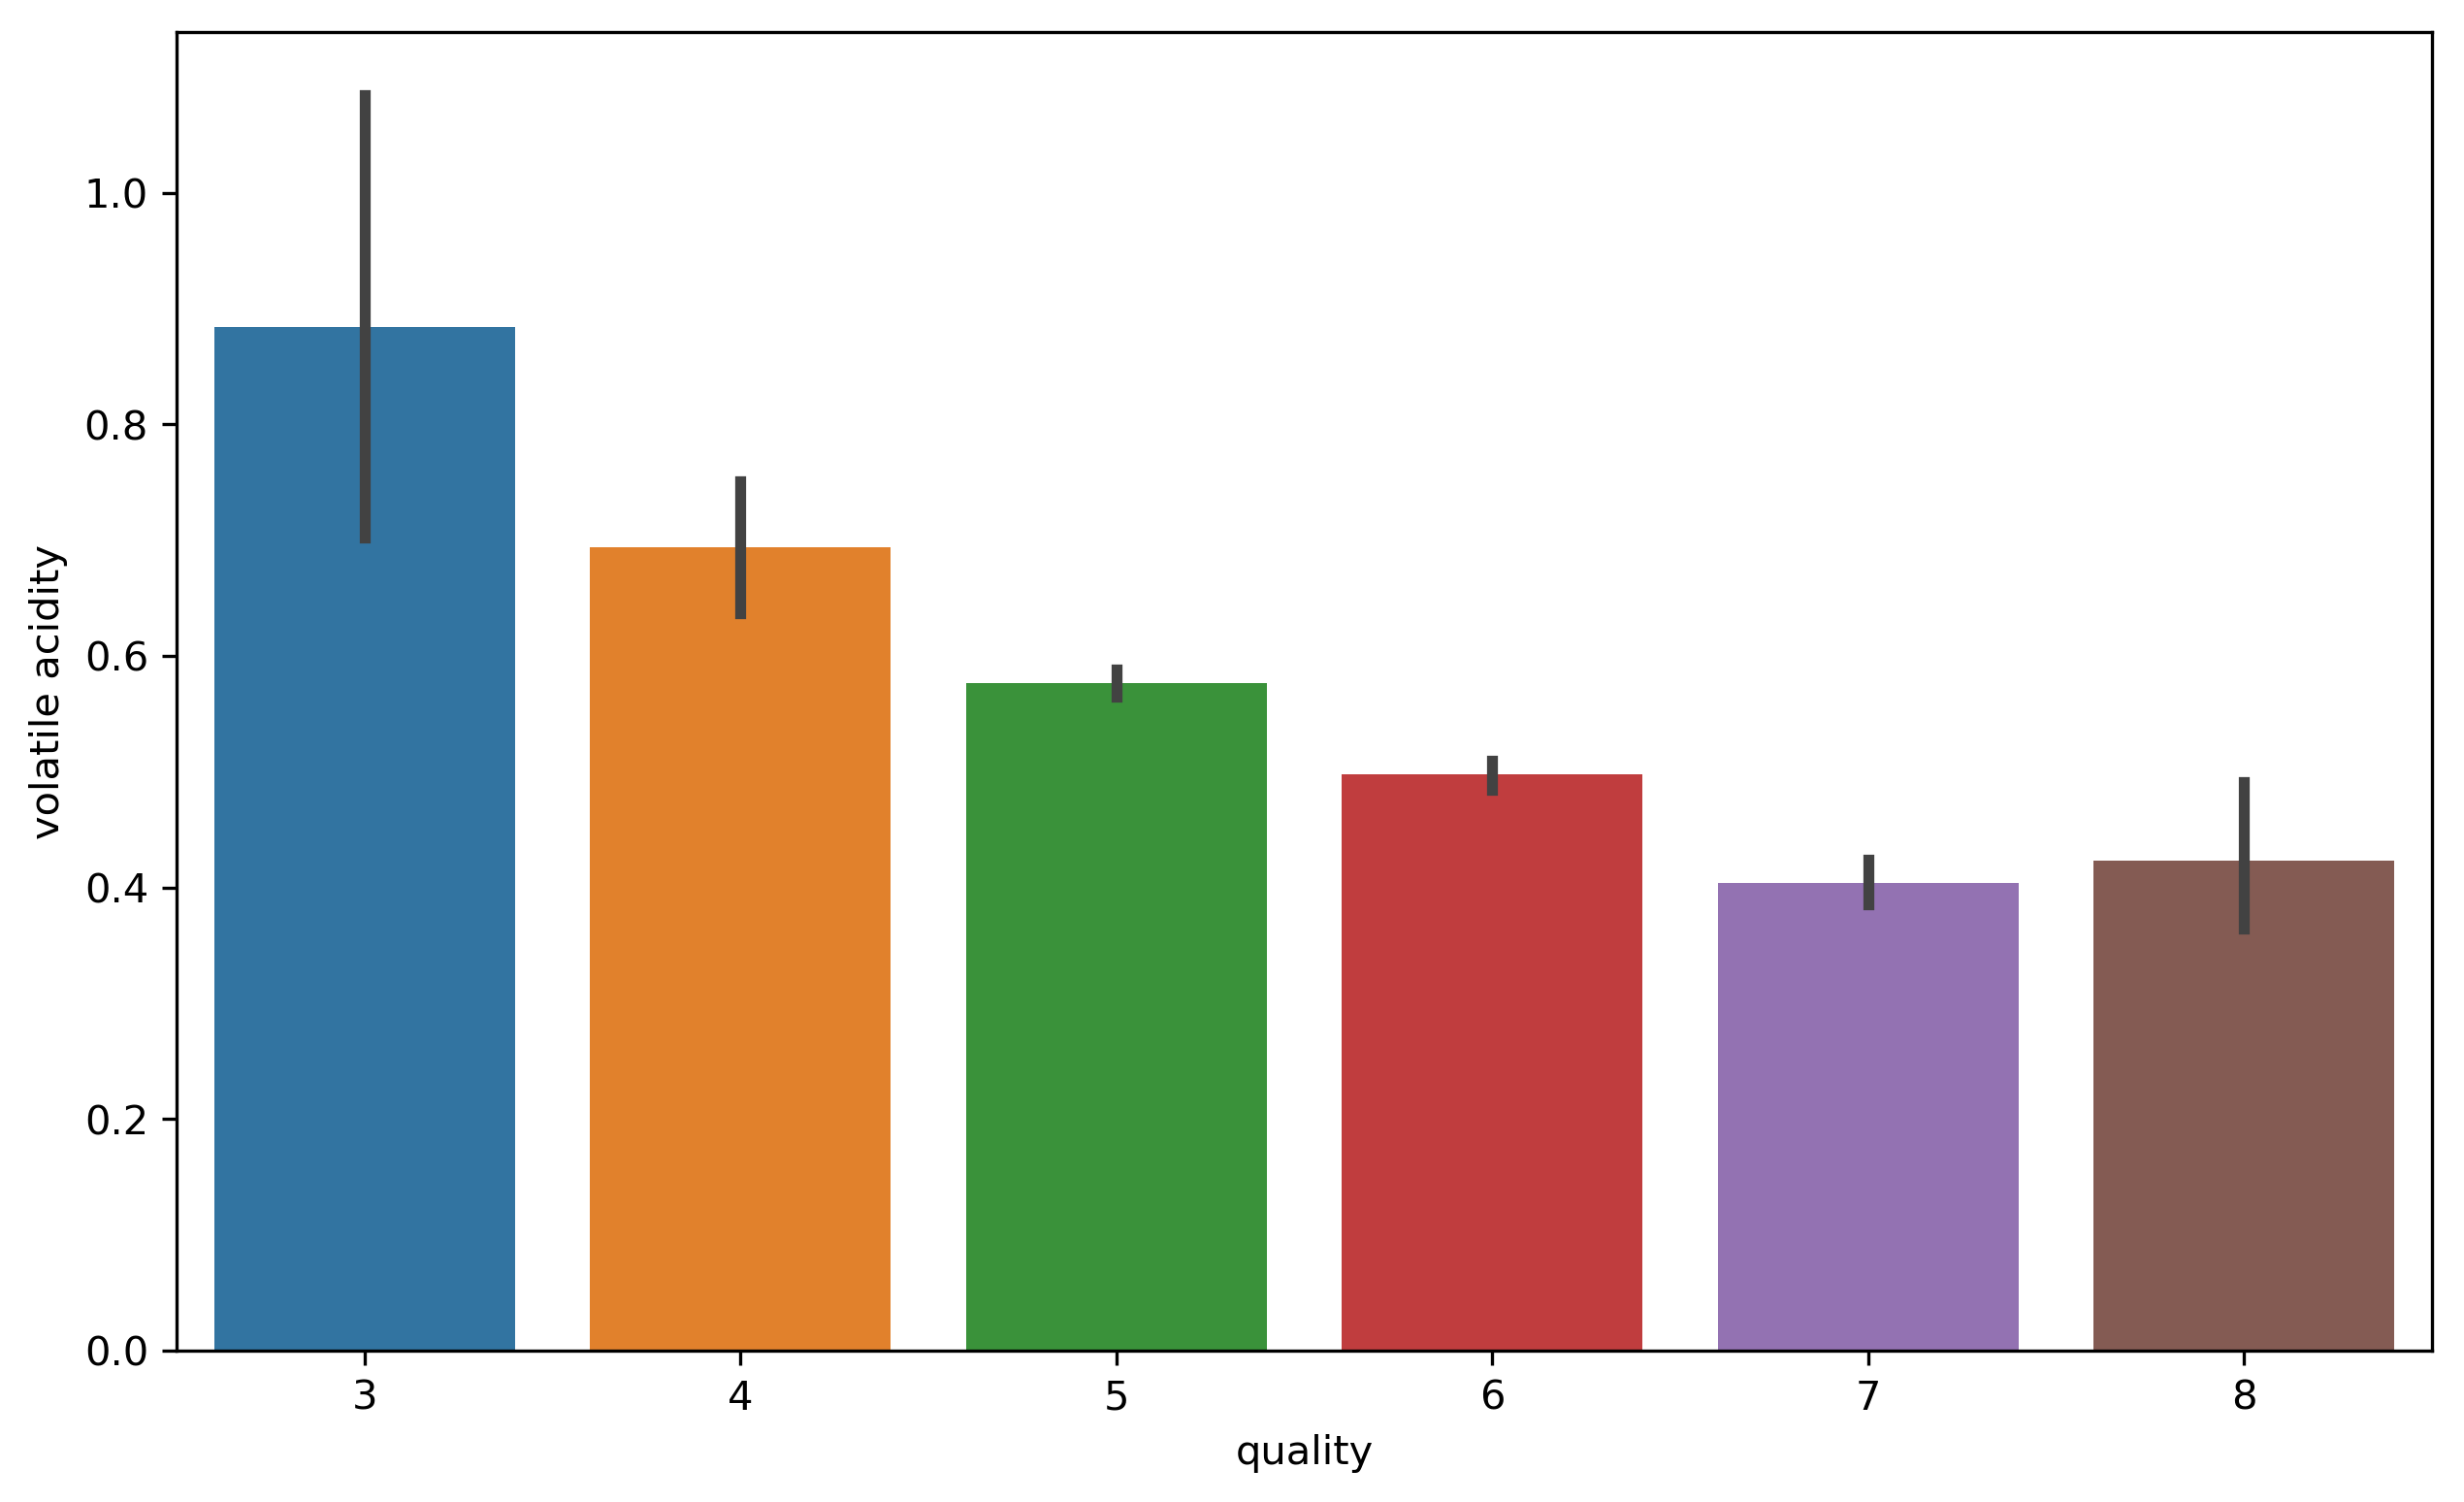

In [14]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6), dpi = 300)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)
#好酒好像真的比较底的volatile

In [15]:
#其实也可以用pandas 本身的method
df[['quality','volatile acidity']].groupby(['quality']).mean()#这样可以求出那个平均数，可是嘛，分布就没了

,volatile acidity
quality,
3,0.884500
4,0.693962
5,0.577041
6,0.497484
7,0.403920
8,0.423333


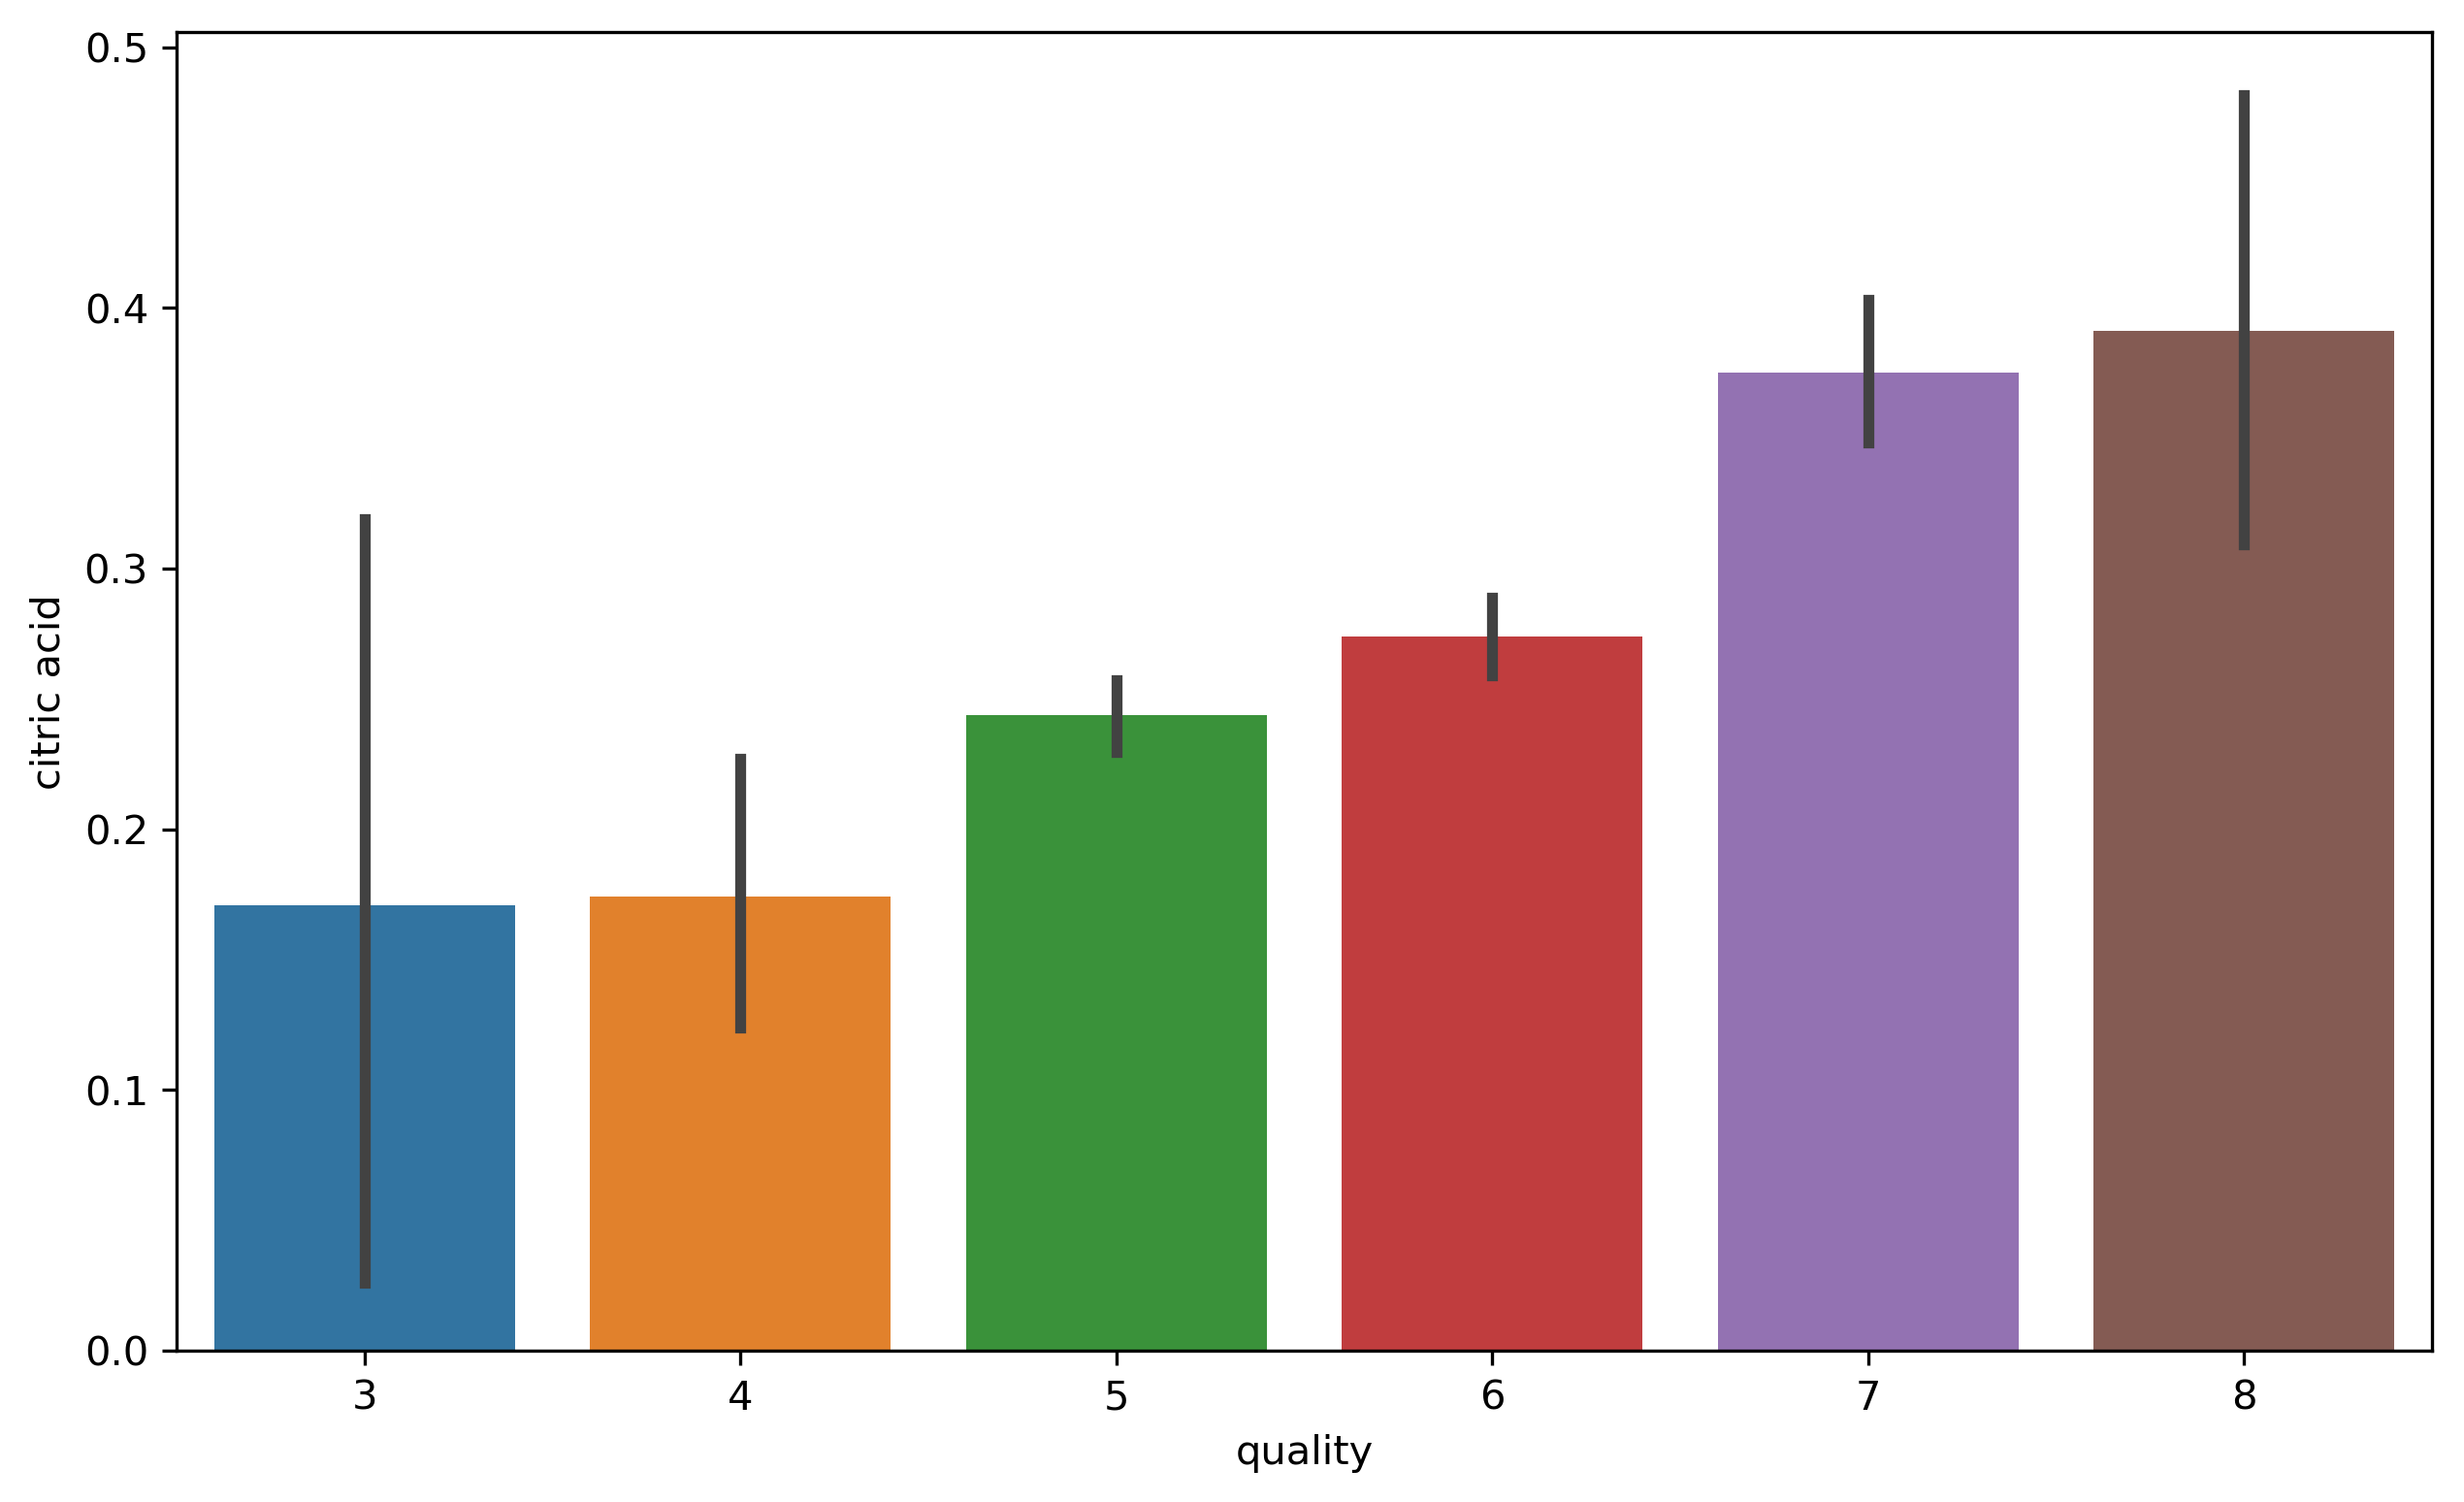

In [16]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6),dpi = 300)
sns.barplot(x = 'quality', y = 'citric acid', data = df)
#c 这个越高越好

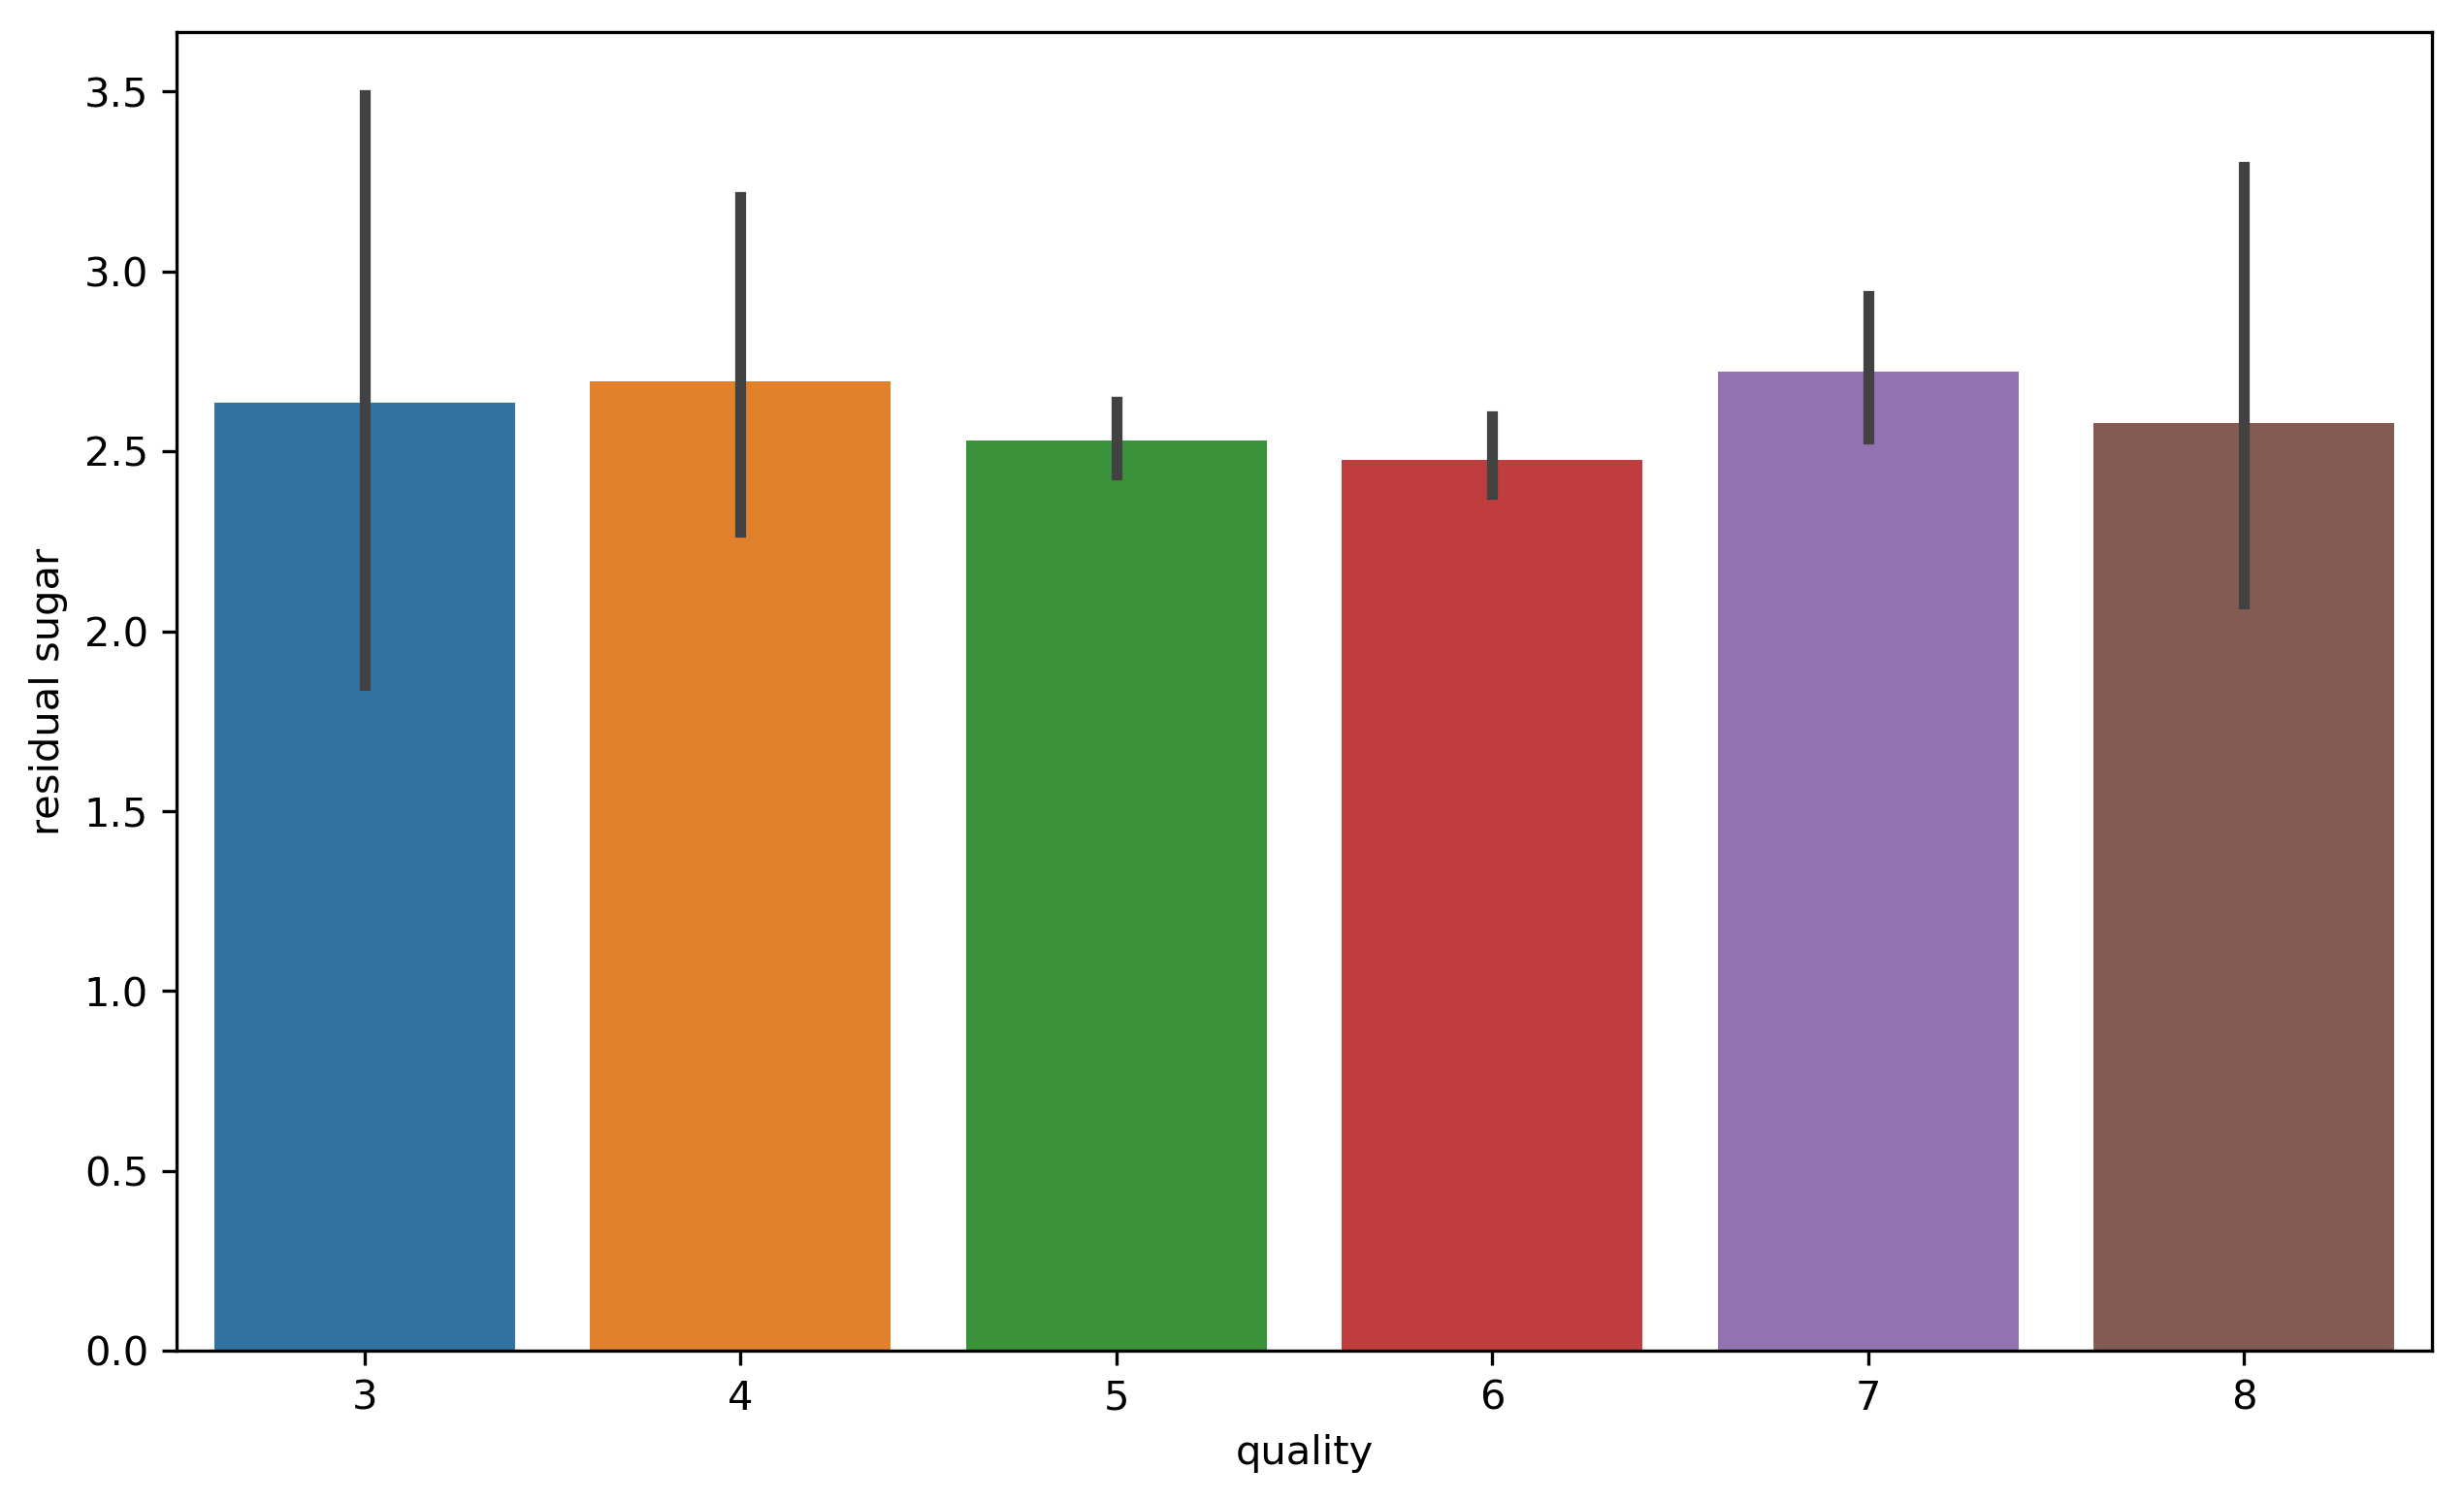

In [17]:
fig = plt.figure(figsize = (10,6), dpi = 300)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

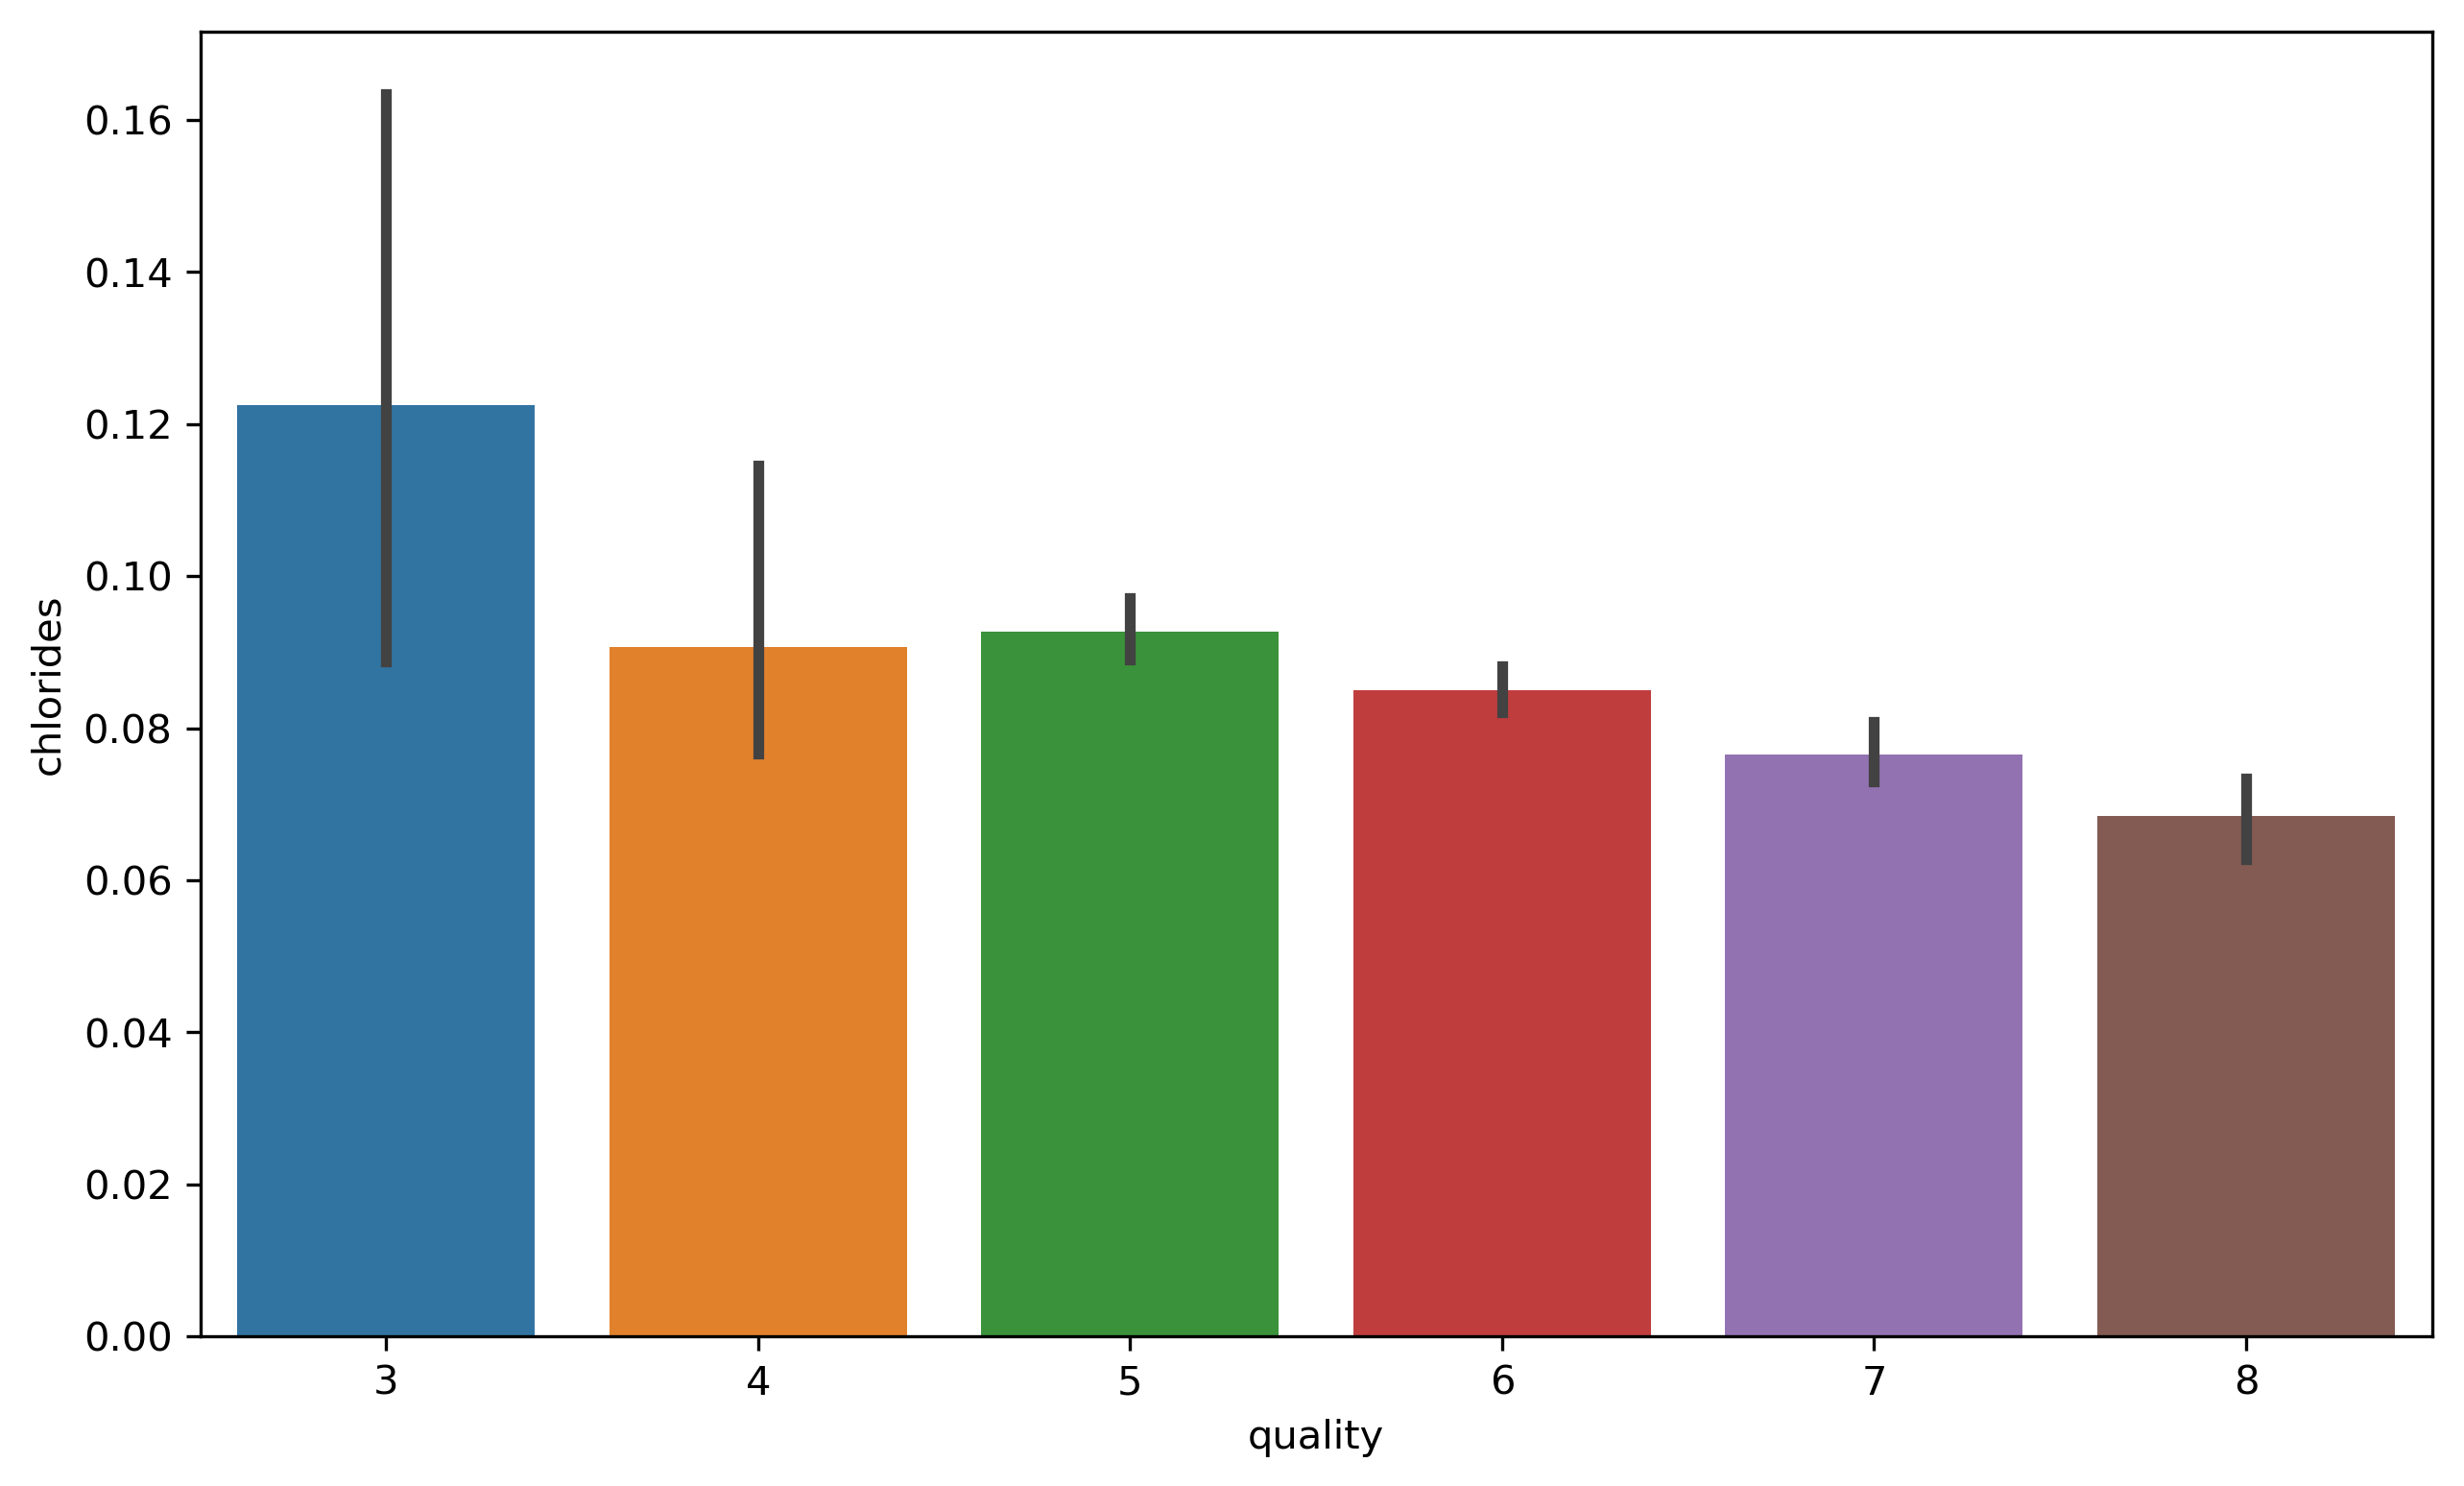

In [18]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6),dpi =300)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

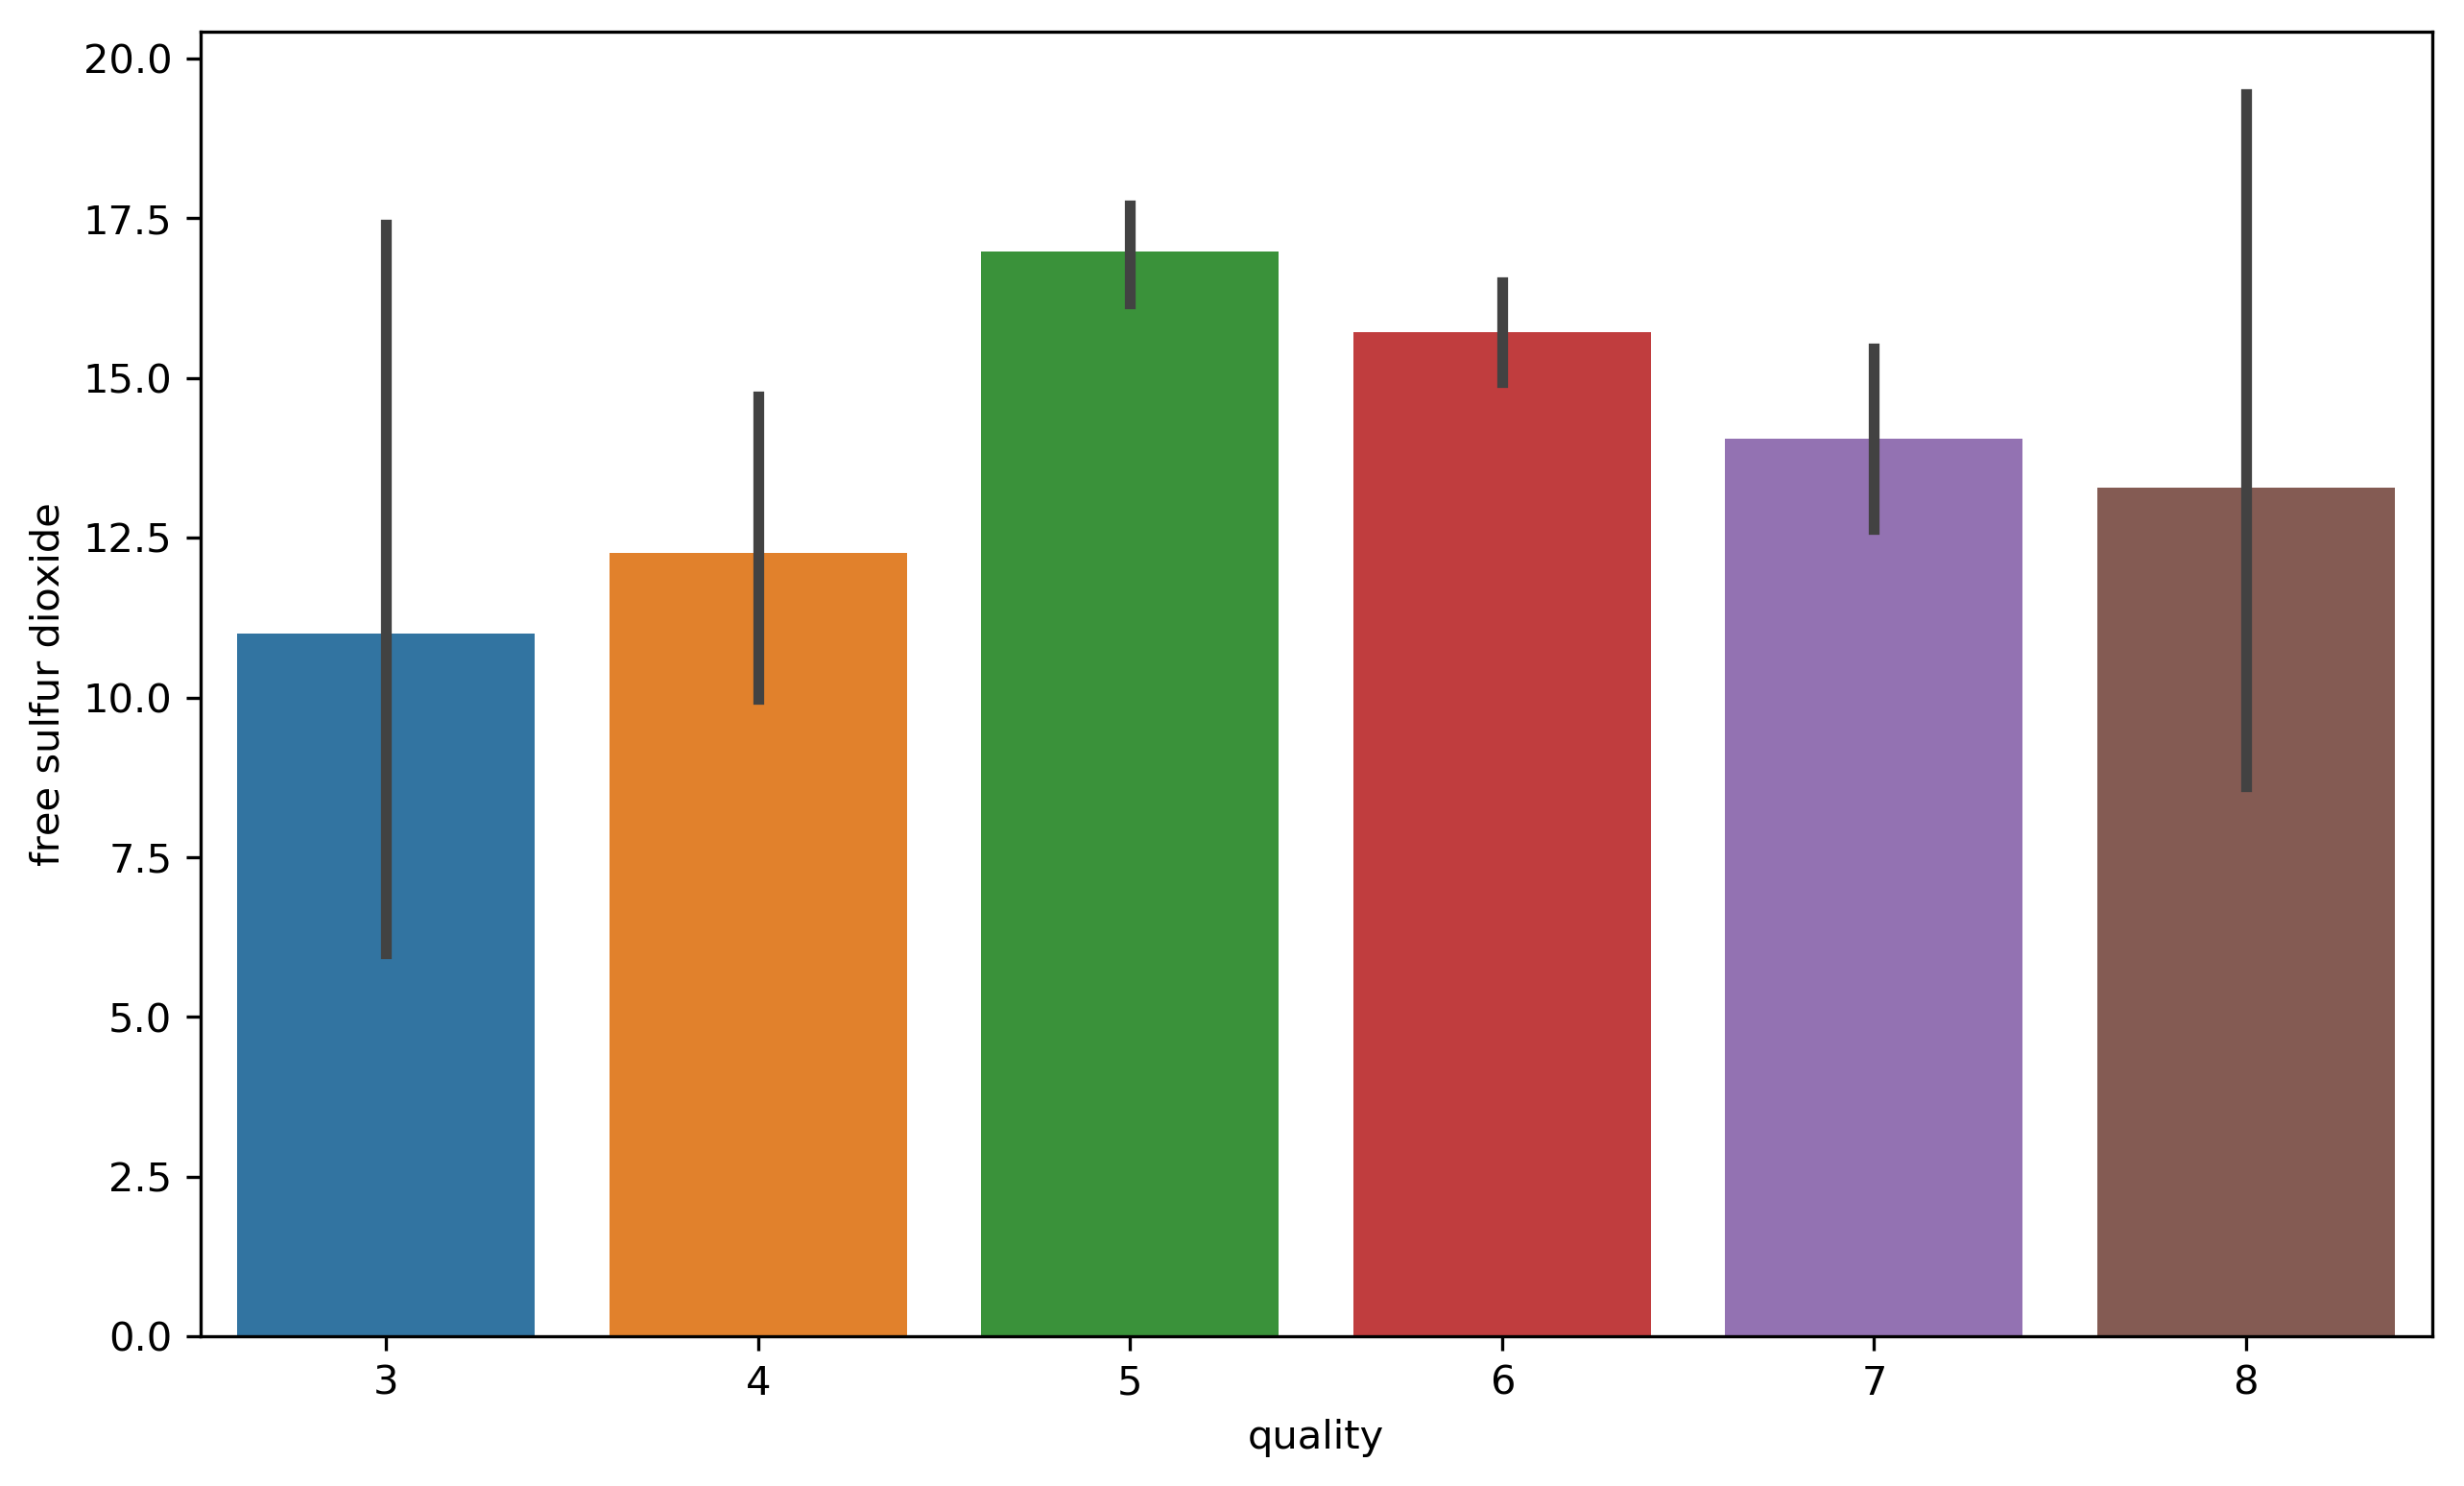

In [19]:
fig = plt.figure(figsize = (10,6),dpi = 300)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

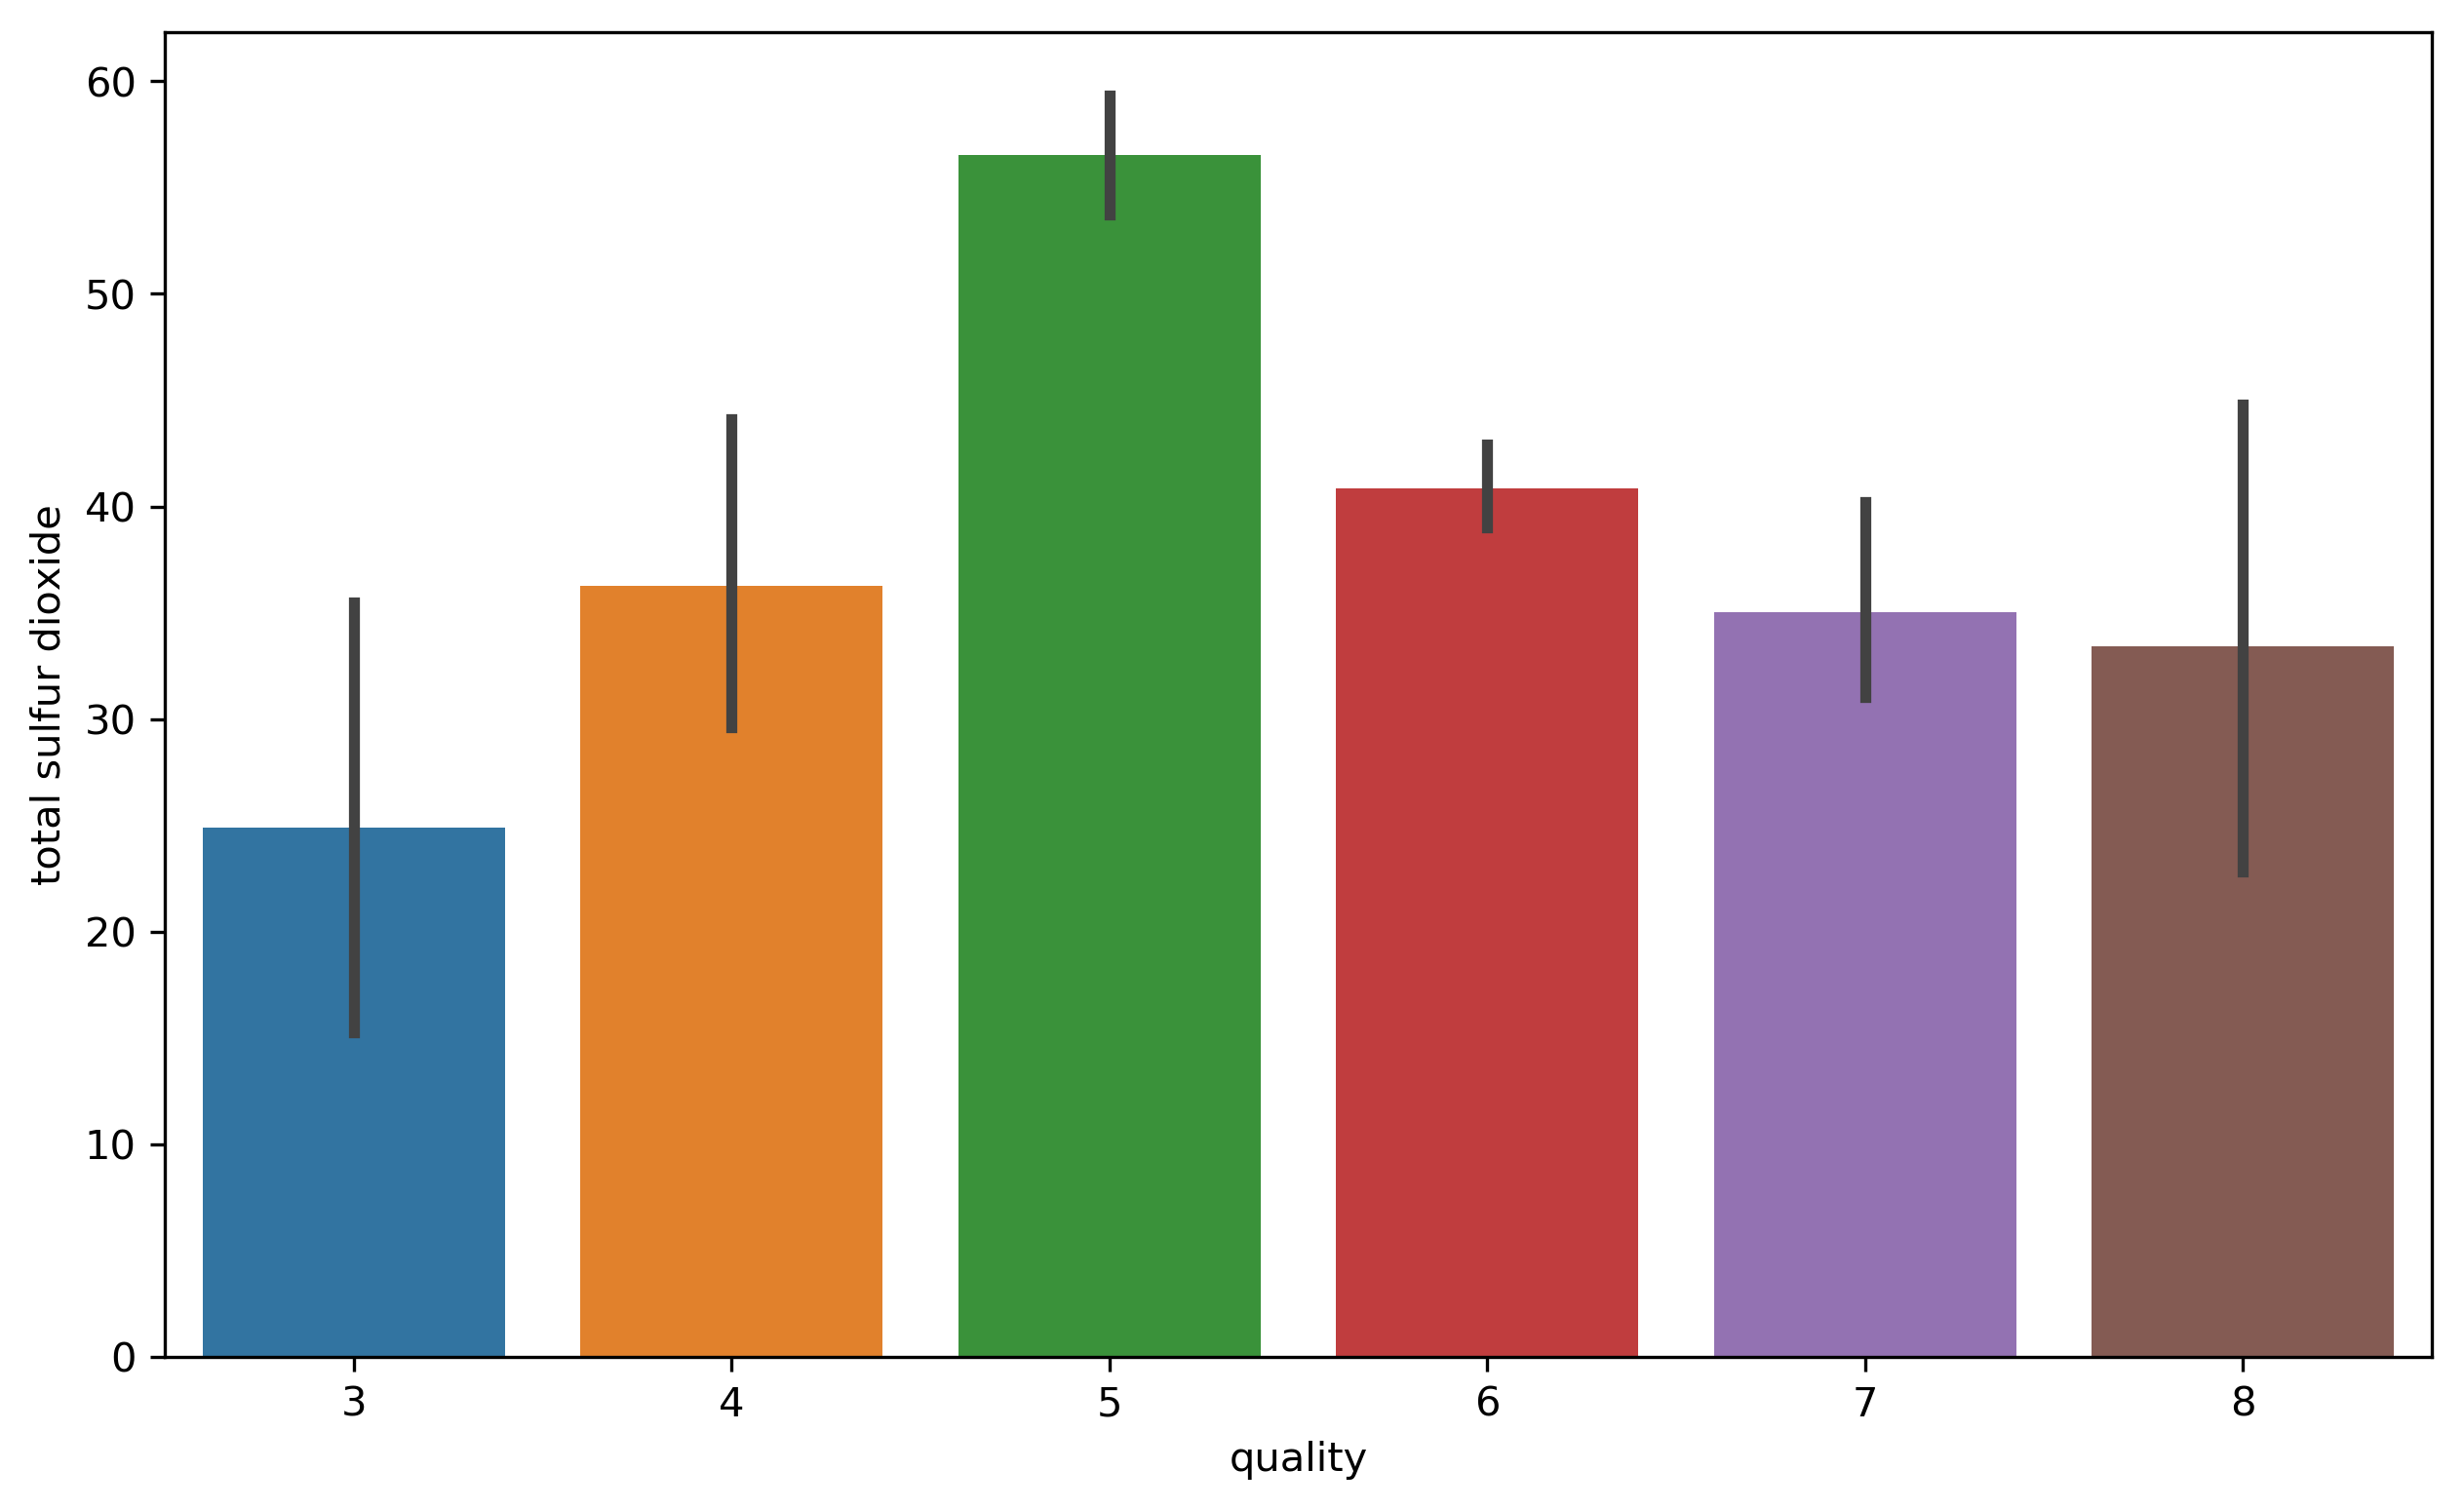

In [20]:
fig = plt.figure(figsize = (10,6),dpi =300)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

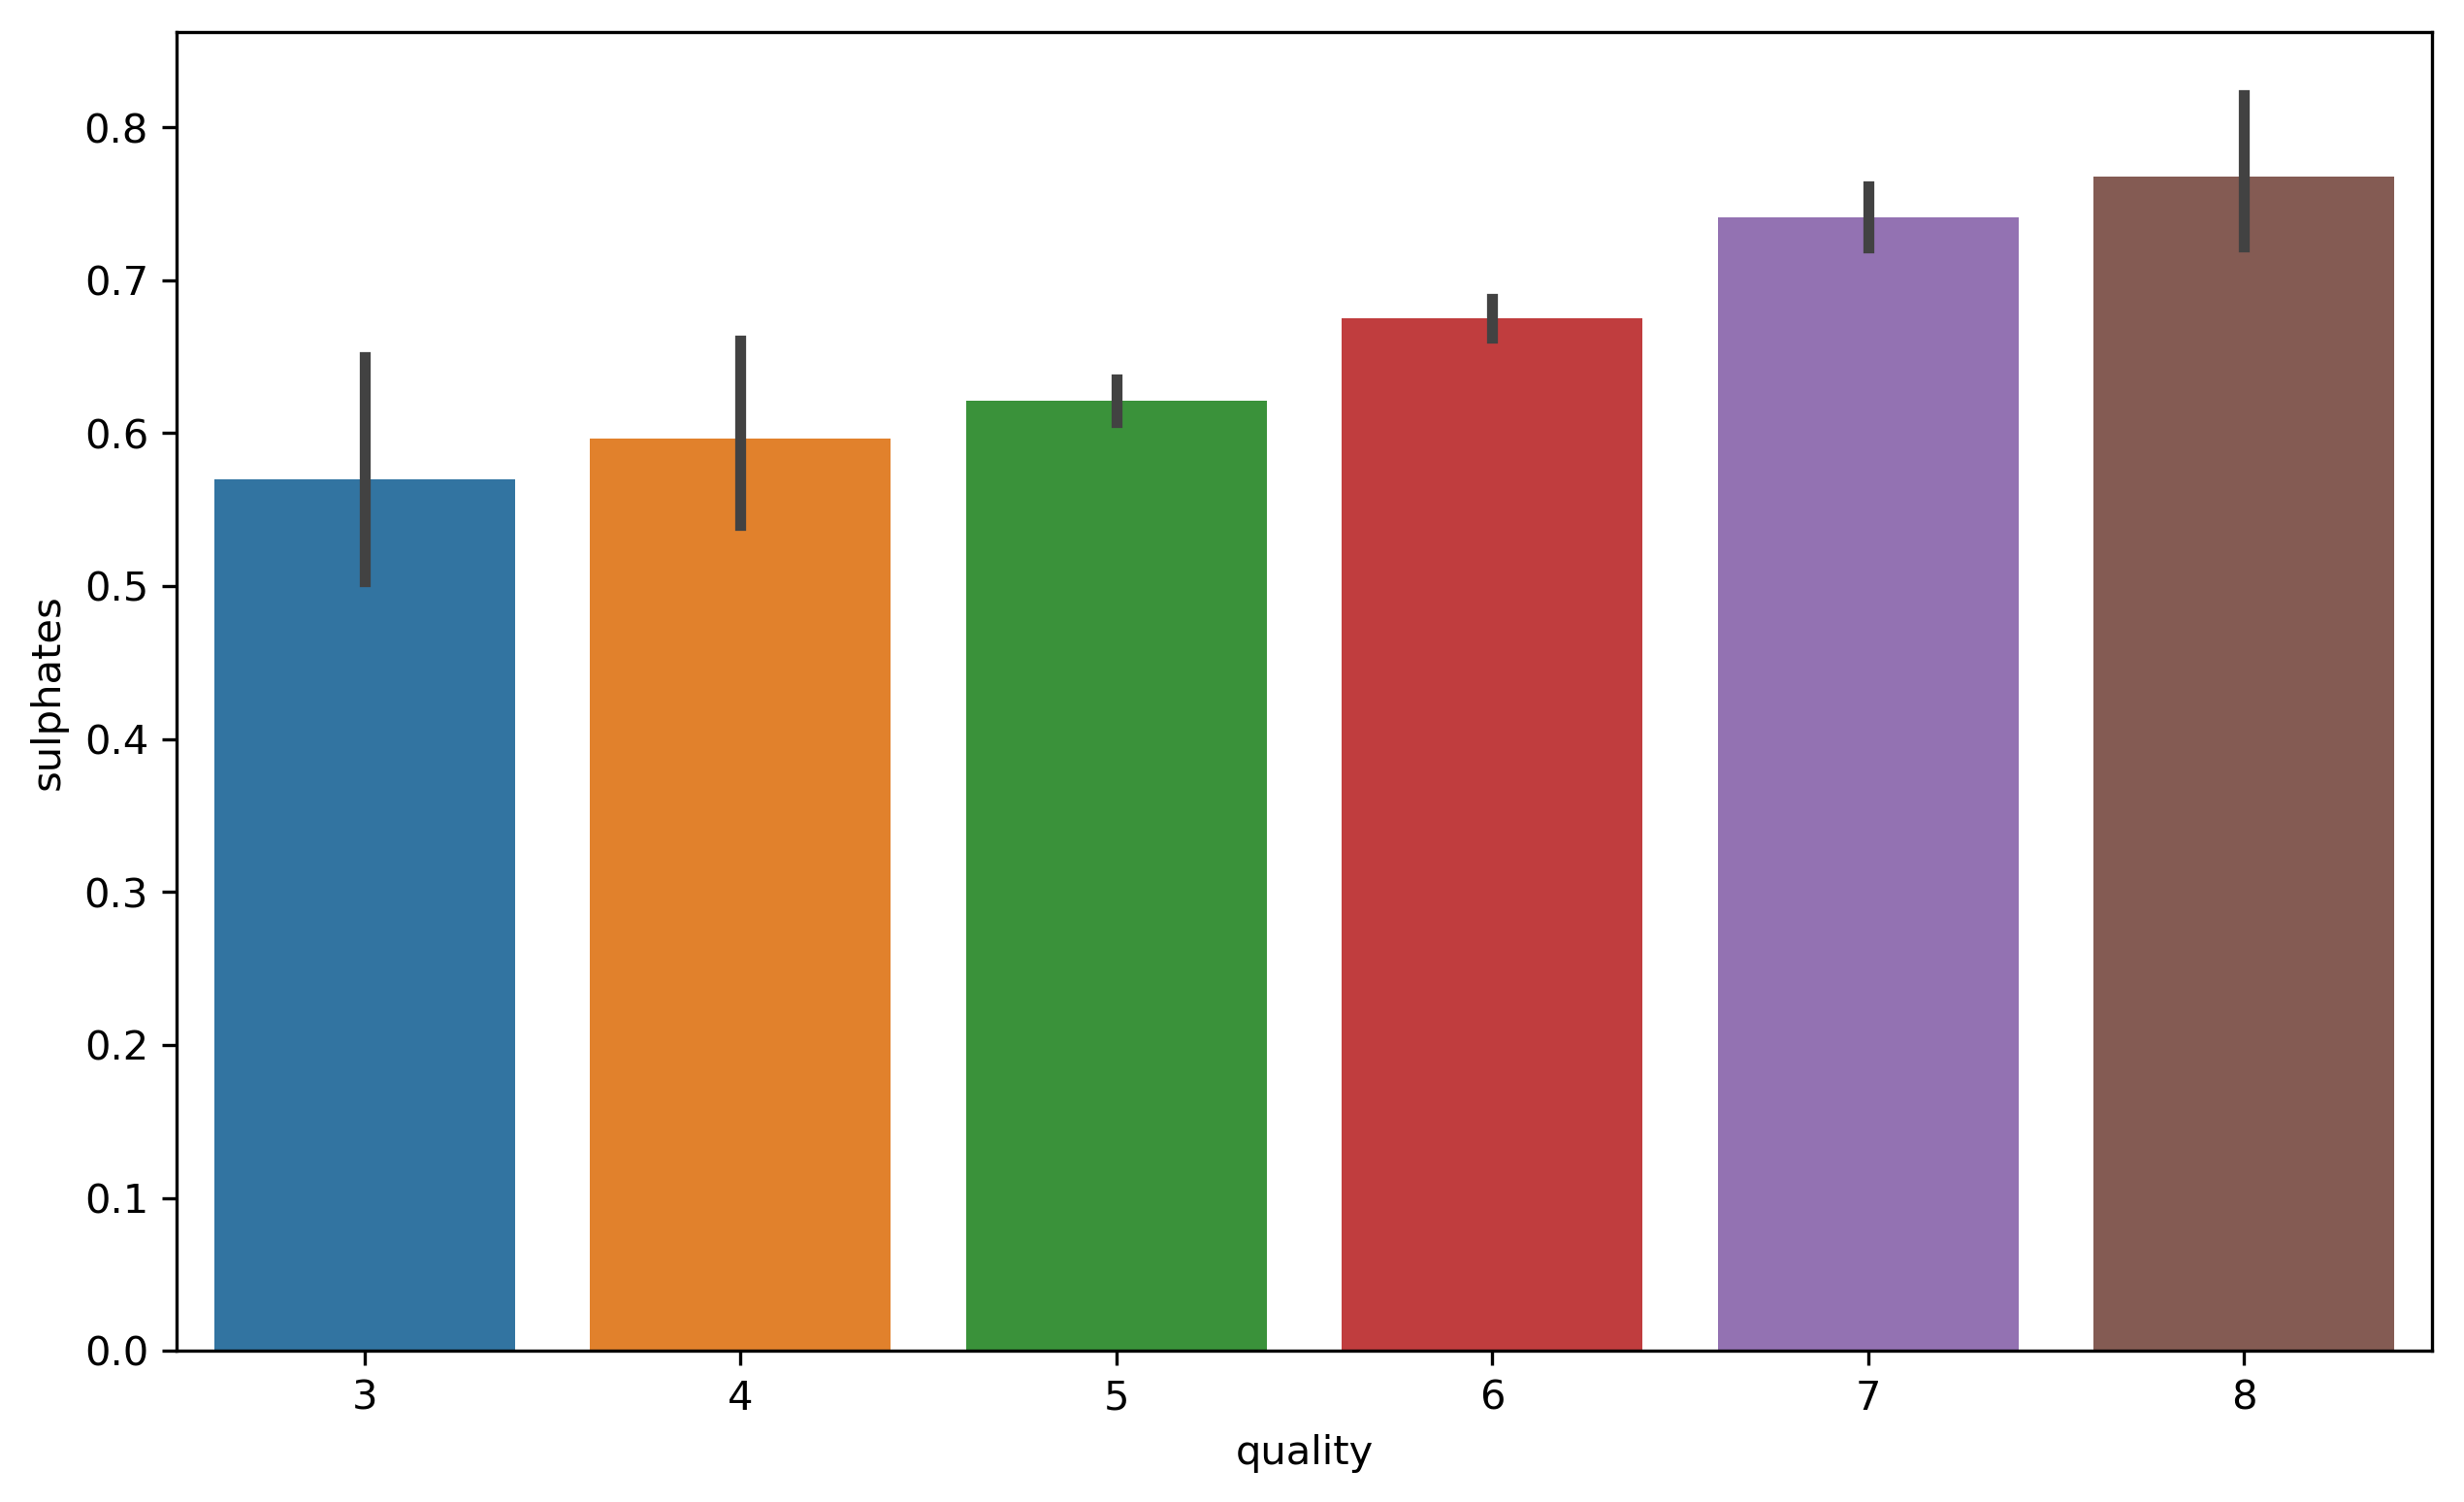

In [21]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6),dpi =300)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

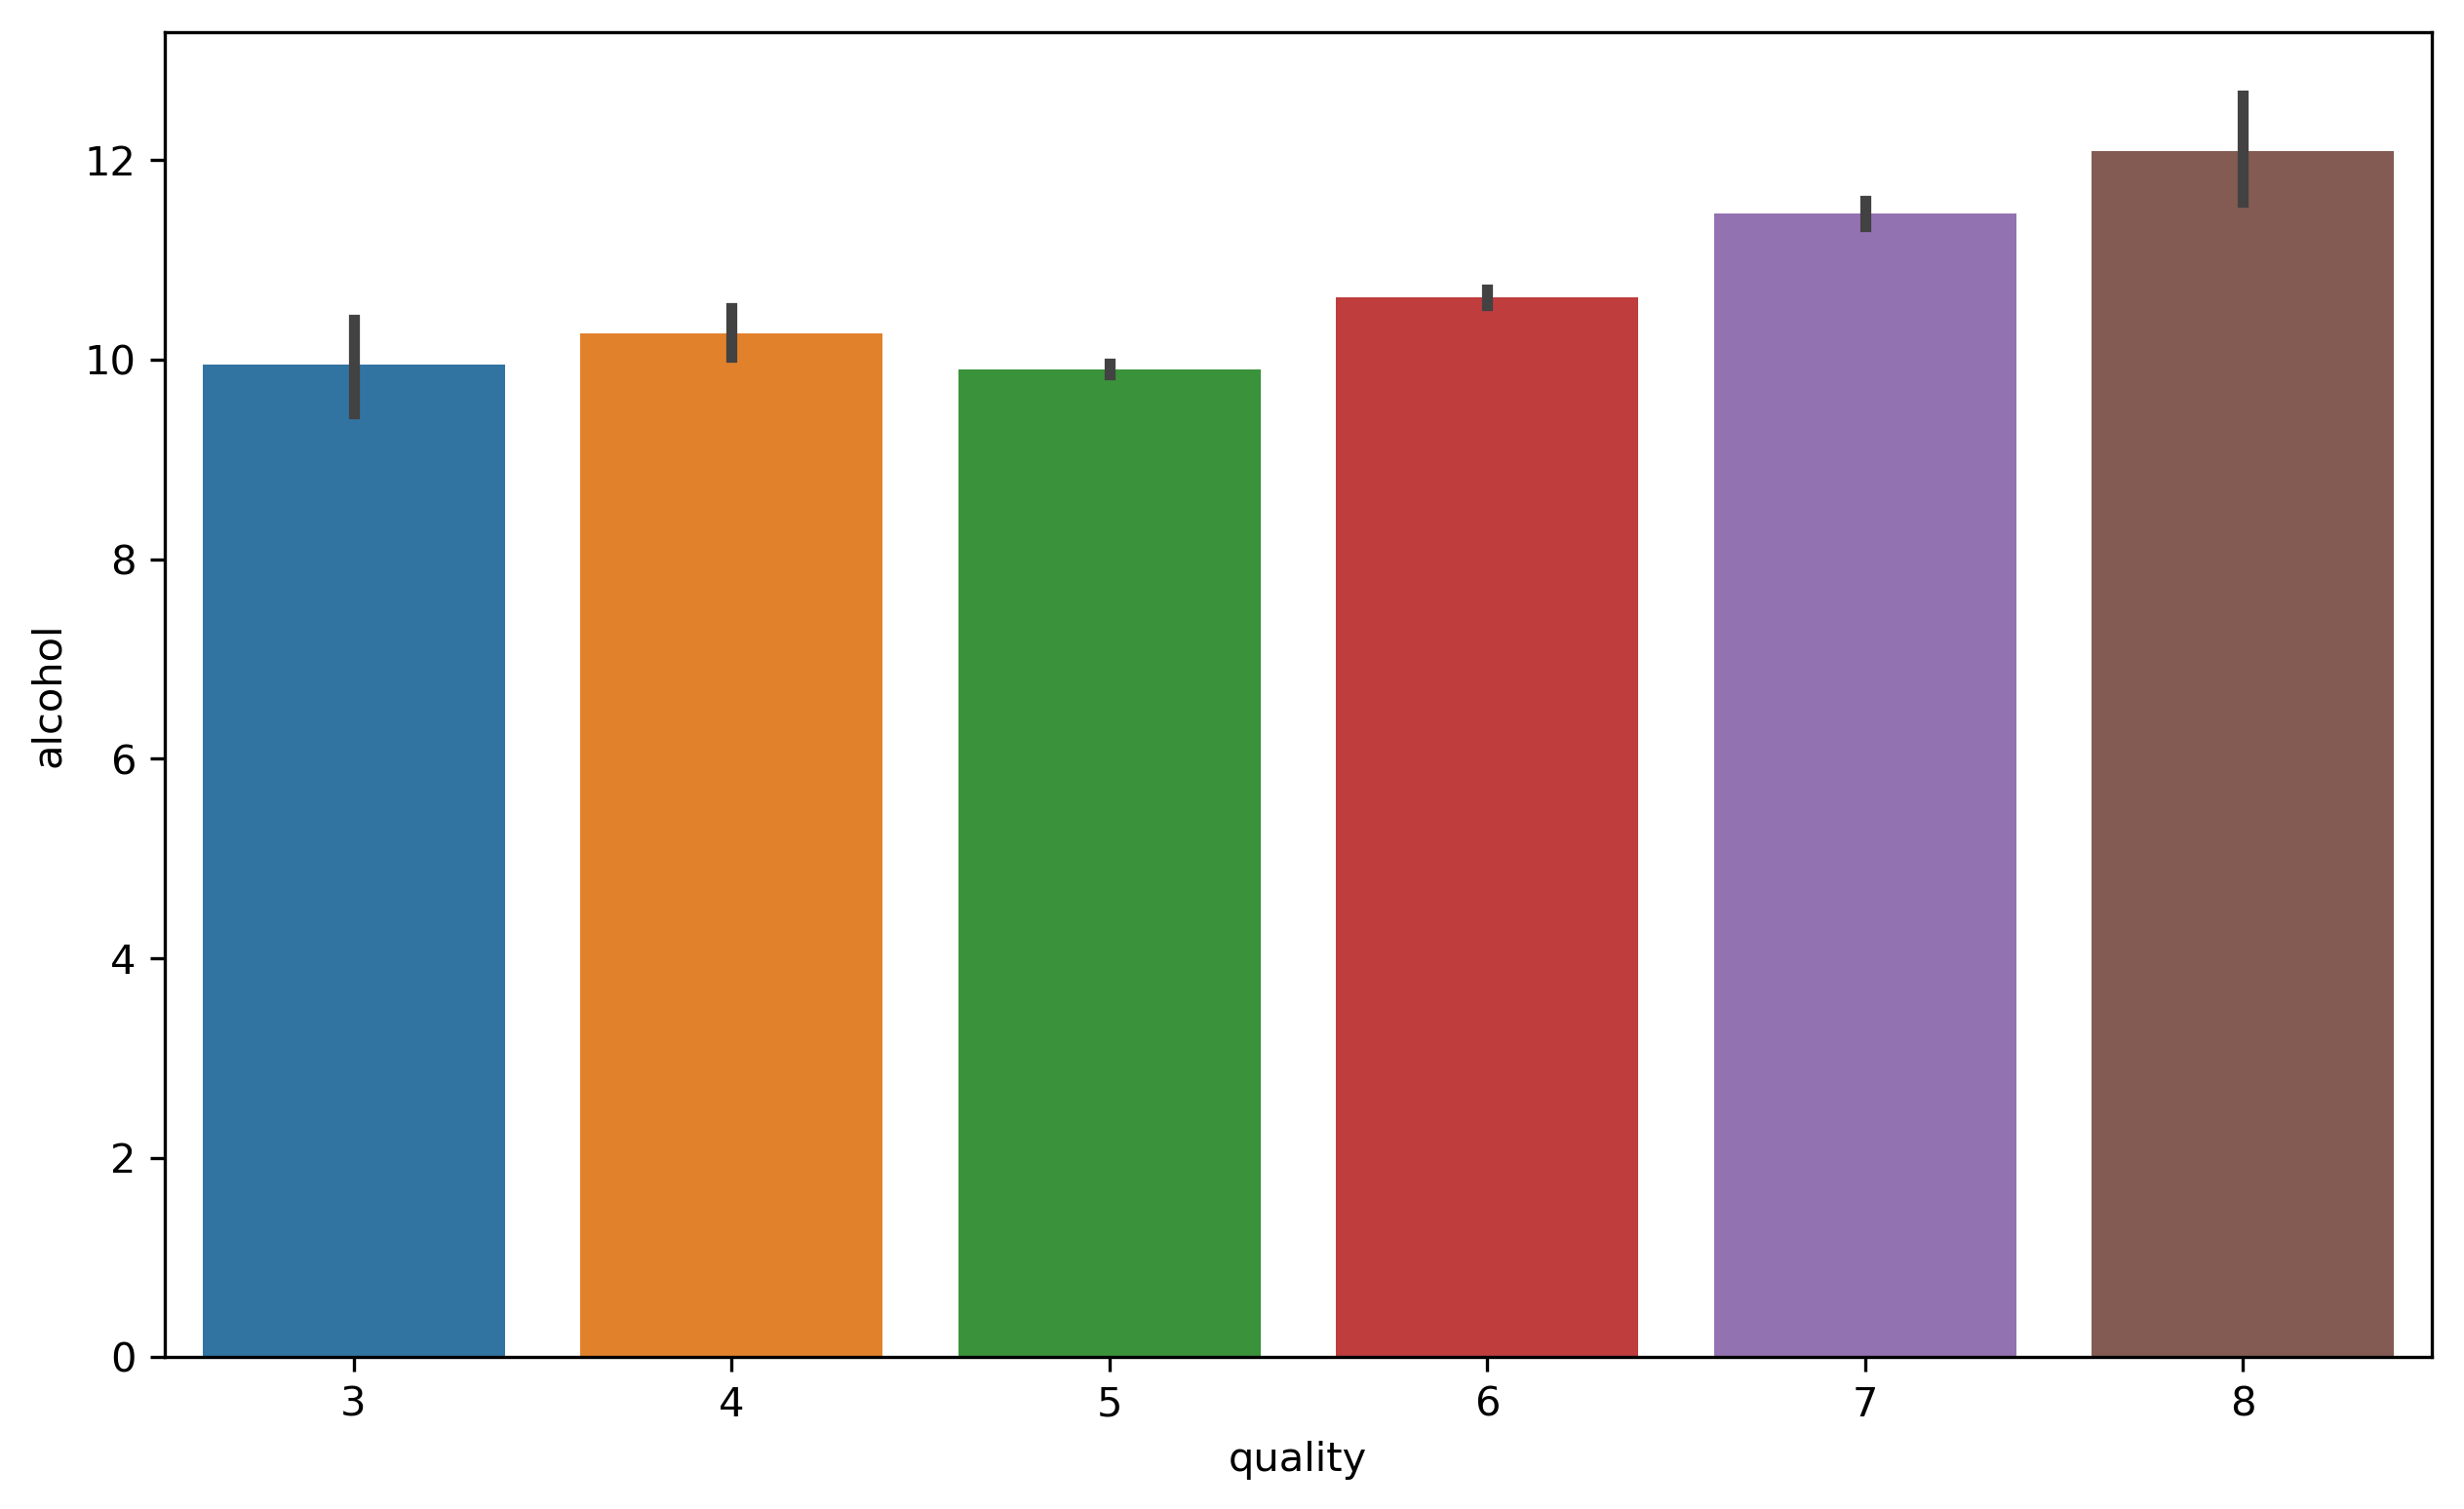

In [22]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6),dpi = 300)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

**这不和filter 很像吗？一个一个feature地和target作比较**
**这样写for loop 一次过弄出来就好了**

In [23]:
#model building 有空再更新
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8) # 有点perceptron的感觉
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)#将品质转换为好坏

In [24]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder() #专业工具，其实就是换target的表述方法，

In [25]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [26]:
df.quality.head()#看看效果

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [27]:
df['quality'].value_counts()#看看数据分布

0    1382
1     217
Name: quality, dtype: int64

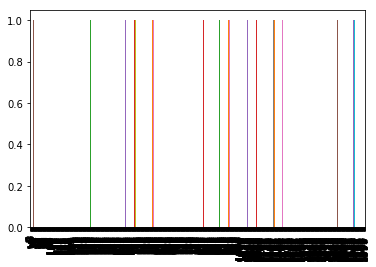

In [28]:
df.quality.plot(kind ='bar')#翻车了

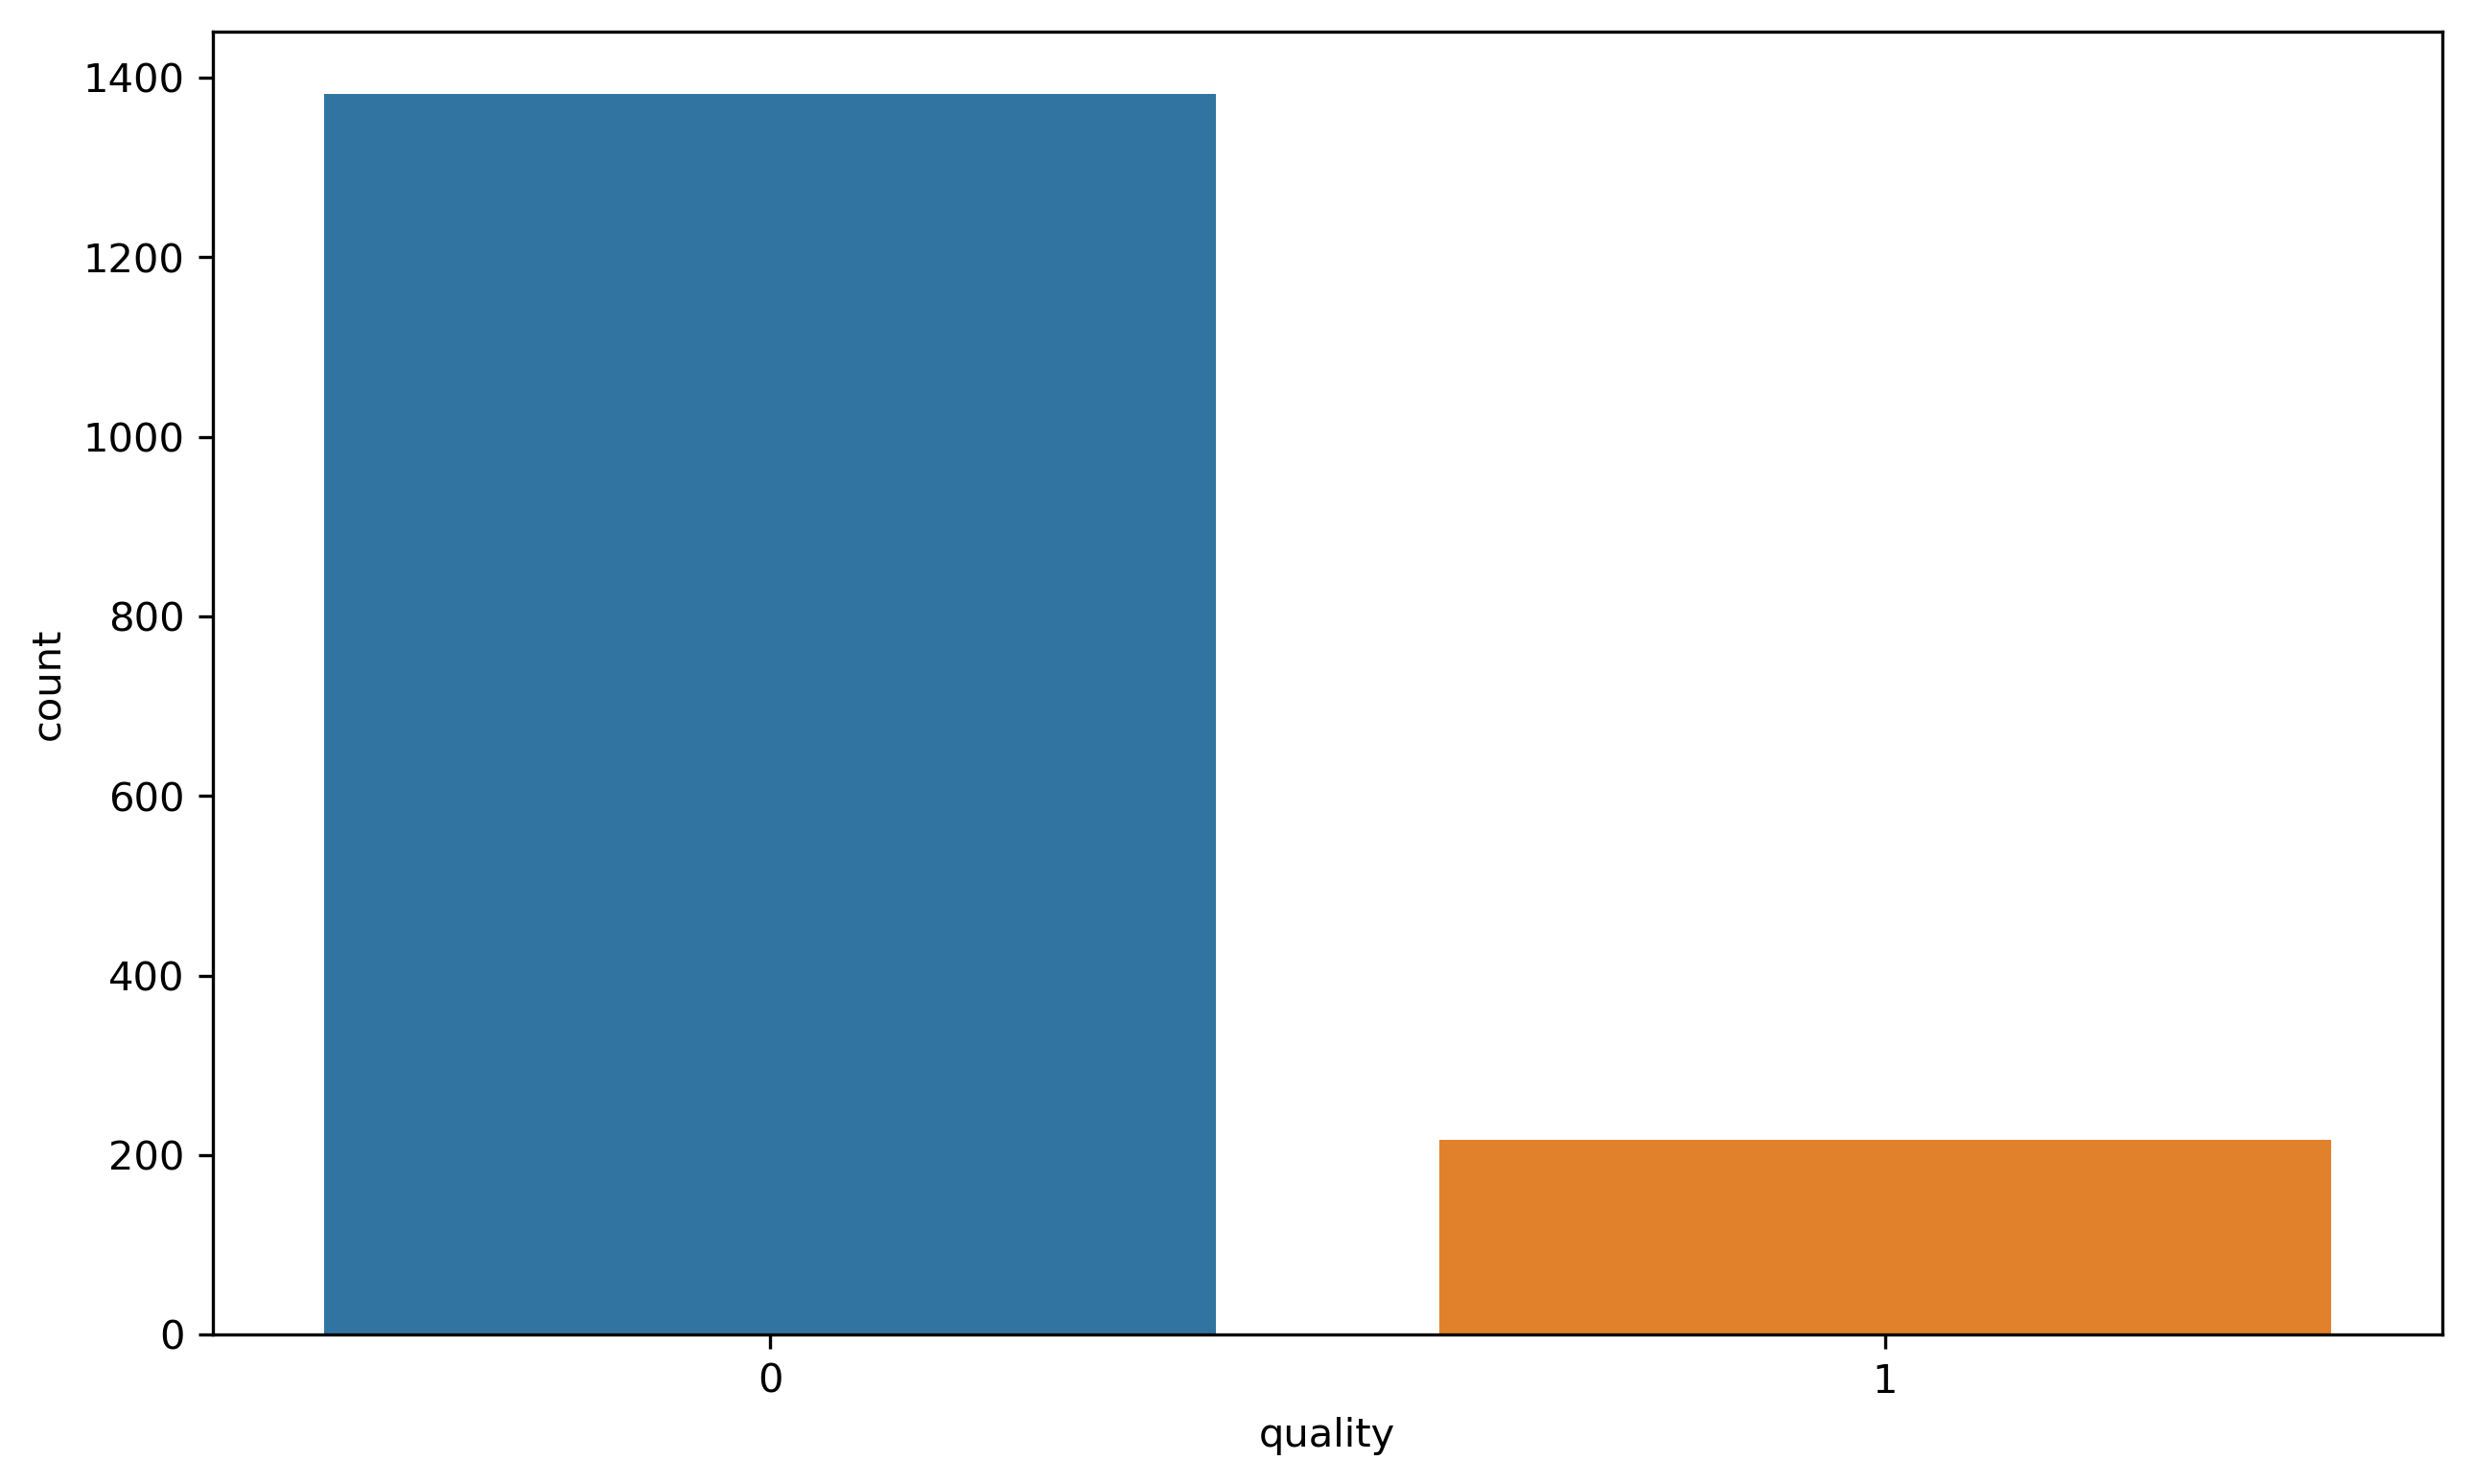

In [29]:
fig = plt.figure(figsize = (10,6),dpi = 300)
sns.countplot(df['quality'])#还是seaborn好用,umbalanced dataset

**世界总是0多1少，0.89凤毛麟角**

In [30]:
X = df.drop('quality',axis = 1).values
y = df['quality'].values
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)#8份训练，2份检验
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [ ]:
#再balance一下data就好了
#Data Imbalence Resolver
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [ ]:
# This is smote and is to clean data.
sm = SMOTE(random_state = 42, ratio = 1)

In [ ]:
X_train.shape

(1279, 11)

In [ ]:
#Model initial
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score


clf1 = GaussianNB()
clf2 = Perceptron(tol=1e-3, random_state=42)
clf3 = RandomForestClassifier(n_estimators='warn', criterion='gini', max_depth=None, 
                          min_samples_split=2, min_samples_leaf=1, 
                          min_weight_fraction_leaf=0.0, max_features='auto', 
                          max_leaf_nodes=None, min_impurity_decrease=0.0, 
                          min_impurity_split=None, bootstrap=True, oob_score=False, 
                          n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                          class_weight=None)
clf4_5 = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=3)
clf4 = SVC(verbose=3)
clf5 = KNeighborsClassifier(n_neighbors=5)
clf6 = LogisticRegression(solver='liblinear')
#前面的不太够用

In [ ]:
#NB with sm

clf1.fit(X_train, y_train)
ypred = clf1.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=ypred)
print(classification_report(y_test, ypred))
test_score = {
    "accuracy":accuracy_score(y_true=y_test,y_pred=ypred),
    "precision":precision_score(y_true=y_test,y_pred=ypred),
    "recall":recall_score(y_true=y_test,y_pred=ypred),
    "f1_score":f1_score(y_true=y_test,y_pred=ypred),
}
print(test_score)
print(confusion_matrix(y_test, ypred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       273
           1       0.50      0.74      0.60        47

   micro avg       0.85      0.85      0.85       320
   macro avg       0.73      0.81      0.75       320
weighted avg       0.89      0.85      0.86       320

{'accuracy': 0.853125, 'precision': 0.5, 'recall': 0.7446808510638298, 'f1_score': 0.5982905982905983}
[[238  35]
 [ 12  35]]


In [ ]:
#看看不banlance data 的结果
X = df.drop('quality',axis = 1).values
y = df['quality'].values
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)#8份训练，2份检验
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [32]:
#NB
clf1.fit(X_train, y_train)
ypred = clf1.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=ypred)
print(classification_report(y_test, ypred))
test_score = {
    "accuracy":accuracy_score(y_true=y_test,y_pred=ypred),
    "precision":precision_score(y_true=y_test,y_pred=ypred),
    "recall":recall_score(y_true=y_test,y_pred=ypred),
    "f1_score":f1_score(y_true=y_test,y_pred=ypred),
}
print(test_score)
print(print(confusion_matrix(y_test, ypred)))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       273
           1       0.50      0.74      0.60        47

   micro avg       0.85      0.85      0.85       320
   macro avg       0.73      0.81      0.75       320
weighted avg       0.89      0.85      0.86       320

{'accuracy': 0.853125, 'precision': 0.5, 'recall': 0.7446808510638298, 'f1_score': 0.5982905982905983}
[[238  35]
 [ 12  35]]
None


**不balance 简直就是学霸成绩啊！！！连贝叶斯都能考高分**

In [33]:
#perceptron 

clf2.fit(X_train, y_train)
ypred = clf2.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=ypred)
print(classification_report(y_test, ypred))
test_score = {
    "accuracy":accuracy_score(y_true=y_test,y_pred=ypred),
    "precision":precision_score(y_true=y_test,y_pred=ypred),
    "recall":recall_score(y_true=y_test,y_pred=ypred),
    "f1_score":f1_score(y_true=y_test,y_pred=ypred),
}
print('PERCEPTRON')
print(test_score)
print(confusion_matrix(y_test, ypred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       273
           1       0.42      0.57      0.49        47

   micro avg       0.82      0.82      0.82       320
   macro avg       0.67      0.72      0.69       320
weighted avg       0.85      0.82      0.83       320

PERCEPTRON
{'accuracy': 0.821875, 'precision': 0.421875, 'recall': 0.574468085106383, 'f1_score': 0.4864864864864865}
[[236  37]
 [ 20  27]]


In [34]:
#Random forest 

clf3.fit(X_train, y_train)
ypred = clf3.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=ypred)
print(classification_report(y_test, ypred))
test_score = {
    "accuracy":accuracy_score(y_true=y_test,y_pred=ypred),
    "precision":precision_score(y_true=y_test,y_pred=ypred),
    "recall":recall_score(y_true=y_test,y_pred=ypred),
    "f1_score":f1_score(y_true=y_test,y_pred=ypred),
}
print('RandomForest')
print(test_score)
print(confusion_matrix(y_test, ypred)) # 不得不说，真学霸

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.71      0.36      0.48        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.87      0.88      0.87       320

RandomForest
{'accuracy': 0.884375, 'precision': 0.7083333333333334, 'recall': 0.3617021276595745, 'f1_score': 0.4788732394366197}
[[266   7]
 [ 30  17]]


/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
#SVM

clf4.fit(X_train, y_train)
ypred = clf4.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=ypred)
print(classification_report(y_test, ypred))
test_score = {
    "accuracy":accuracy_score(y_true=y_test,y_pred=ypred),
    "precision":precision_score(y_true=y_test,y_pred=ypred),
    "recall":recall_score(y_true=y_test,y_pred=ypred),
    "f1_score":f1_score(y_true=y_test,y_pred=ypred),
}
print('SVM')
print(test_score)
print(confusion_matrix(y_test, ypred))

[LibSVM]              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

SVM
{'accuracy': 0.875, 'precision': 0.7058823529411765, 'recall': 0.2553191489361702, 'f1_score': 0.37499999999999994}
[[268   5]
 [ 35  12]]


In [36]:
#linear SVM

clf4_5.fit(X_train, y_train)
ypred = clf4_5.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=ypred)
print(classification_report(y_test, ypred))
test_score = {
    "accuracy":accuracy_score(y_true=y_test,y_pred=ypred),
    "precision":precision_score(y_true=y_test,y_pred=ypred),
    "recall":recall_score(y_true=y_test,y_pred=ypred),
    "f1_score":f1_score(y_true=y_test,y_pred=ypred),
}
print('L SVM')
print(test_score)
print(confusion_matrix(y_test, ypred))

[LibLinear]              precision    recall  f1-score   support

           0       0.88      0.99      0.93       273
           1       0.82      0.19      0.31        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.85      0.59      0.62       320
weighted avg       0.87      0.88      0.84       320

L SVM
{'accuracy': 0.875, 'precision': 0.8181818181818182, 'recall': 0.19148936170212766, 'f1_score': 0.31034482758620685}
[[271   2]
 [ 38   9]]


/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
#KNN 你最熟悉的邻居~

clf5.fit(X_train, y_train)
ypred = clf5.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=ypred)
print(classification_report(y_test, ypred))
test_score = {
    "accuracy":accuracy_score(y_true=y_test,y_pred=ypred),
    "precision":precision_score(y_true=y_test,y_pred=ypred),
    "recall":recall_score(y_true=y_test,y_pred=ypred),
    "f1_score":f1_score(y_true=y_test,y_pred=ypred),
}
print('KNN')
print(test_score)
print(confusion_matrix(y_test, ypred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.61      0.40      0.49        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.86      0.88      0.86       320

KNN
{'accuracy': 0.875, 'precision': 0.6129032258064516, 'recall': 0.40425531914893614, 'f1_score': 0.48717948717948717}
[[261  12]
 [ 28  19]]


In [38]:
#Logis

clf6.fit(X_train, y_train)
ypred = clf6.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=ypred)
print(classification_report(y_test, ypred))
test_score = {
    "accuracy":accuracy_score(y_true=y_test,y_pred=ypred),
    "precision":precision_score(y_true=y_test,y_pred=ypred),
    "recall":recall_score(y_true=y_test,y_pred=ypred),
    "f1_score":f1_score(y_true=y_test,y_pred=ypred),
}
print('Logistics Regression')
print(test_score)
print(confusion_matrix(y_test, ypred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Logistics Regression
{'accuracy': 0.875, 'precision': 0.7058823529411765, 'recall': 0.2553191489361702, 'f1_score': 0.37499999999999994}
[[268   5]
 [ 35  12]]


**玄学调参**

In [39]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#分别调6个model的参
#然后就请大哥 NN 出来
#再用不同的LGBT 的 NN 

#其实啊就是争取做到overfitting 但是testing的结果蜜汁好

#NB不调，Perceptron不调

In [40]:
from scipy.stats import randint
## Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,4,5,6,7,8,9,10],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=10)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/l

/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/l

/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcowang/anaconda3/l

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 8, 'min_samples_leaf': 8}
Best score is 0.893666927286943


In [41]:
#SVM
#SVM tuning Params
C = [ 0.01, 0.1, 1, 10, 100] 
degree = [1,2]
gamma = [.001, .01,]
kernel = ["rbf","poly"]
parameters_svm = {'svc__C':C, 'svc__degree': degree, 'svc__gamma':gamma,'svc__kernel':kernel }

# Instantiate a SVM classifier: logreg
svm = SVC()

# Instantiate the GridSearchCV object: SVM_cv
SVM_cv = GridSearchCV(svm, param_grid=parameters_svm, cv=10)

# Fit it to the data
SVM_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(SVM_cv.best_params_)) 
print("Best score is {}".format(SVM_cv.best_score_))

ValueError: Invalid parameter svc for estimator SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
#KNN Tuning Params
k = [1, 3, 5, 11, 21, 41, 61, 81]
parameters_knn = {'kneighborsclassifier__n_neighbors':k}
# Instantiate a KNN classifier: KNN
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object: logreg_cv
knn_cv = GridSearchCV(knn, param_grid=parameters_knn, cv=10)

# Fit it to the data
knn_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

In [ ]:
#Logis
import numpy as np
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

In [2]:
from keras.layers import Input, Dense, Add, Concatenate
from keras.models import Model # Using model to compile 
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.layers import Embedding
from keras.layers import Flatten #for time, text and image data 

Using TensorFlow backend.


In [3]:
input_tensor = Input((11,))
hidden_tensor = Dense(256, activation='relu')(input_tensor)
hidden_tensor = Dense(256, activation='relu')(hidden_tensor)
hidden_tensor = Dense(256, activation='relu')(hidden_tensor)
output_tensor = Concatenate()([input_tensor, hidden_tensor])
output_tensor = Dense(1, activation='relu')(output_tensor)
model = Model(input_tensor,output_tensor)
model.compile(optimizer = 'adam',loss = 'binary_crossentropy')

In [ ]:
model.fit(X_train,y_train,epochs=3,batch_size=1279)

Epoch 1/3


**pytorch**

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [42]:
#用class 来搭建NN
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer，每个都是线性的
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [48]:
Xr_torch = torch.from_numpy(X_train)
Xt_torch = torch.from_numpy(X_test)
yr_torch = torch.from_numpy(y_train)
yt_torch = torch.from_numpy(y_test)

In [49]:
x = Variable(Xr_torch)
y = Variable(yr_torch)

In [44]:
net = Net(n_feature=11, n_hidden=100, n_output=1)     # define the network
print(net)  # net architecture

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is an one-hotted

Net(
  (hidden): Linear(in_features=11, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=1, bias=True)
)


In [50]:
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    


RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #4 'mat1'

In [ ]:
#翻车